# Un-zip data

In [3]:
import os, zipfile
import glob
import pandas as pd
import csv
import datetime
import numpy as np

In [46]:
for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12' ]:

    dir_name = r"I:\15_DATA\05_Traffic Data\FMS\2017\1Hour"+ "\\"+ year
    extension = ".zip"
    os.chdir(dir_name) # change directory from working dir to dir with files

    for item in os.listdir(dir_name): # loop through items in dir
        if item.endswith(extension): # check for ".zip" extension
            file_name = os.path.abspath(item) # get full path of files
            zip_ref = zipfile.ZipFile(file_name) # create zipfile object
            zip_ref.extractall(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"+ "\\"+ year) # extract file to dir
            zip_ref.close() # close file
            #os.remove(file_name) # delete zipped file

file name list

In [1]:
# use os.chdir() Method to change the directory info
#for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12' ]:  
'''    year= "2017_01"
    dir_name = r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"+ "\\"+ year
    os.chdir(dir_name +year+ )
    path=os.getcwd() # get the path info
    files=os.listdir(path) #get the files into the list
    files_csv=[f for f in files if f[-3:]=='csv'] # a for loop to put excel file to the list f


    with open(year+".csv", 'w',newline='') as f_2: # output csv file, open csv file
            writer = csv.writer(f_2) # input object
            for single_file_name in files_csv:
                filename = single_file_name
                f_name=filename
                writer.writerow([str(f_name),]) #output the file names to the csv object'''

'    year= "2017_01"\n    dir_name = r"I:\x06_PROJECTS\\In-house\\i5012002 Fwy Seasonal Variation Factors"+ "\\"+ year\n    os.chdir(dir_name +year+ )\n    path=os.getcwd() # get the path info\n    files=os.listdir(path) #get the files into the list\n    files_csv=[f for f in files if f[-3:]==\'csv\'] # a for loop to put excel file to the list f\n\n\n    with open(year+".csv", \'w\',newline=\'\') as f_2: # output csv file, open csv file\n            writer = csv.writer(f_2) # input object\n            for single_file_name in files_csv:\n                filename = single_file_name\n                f_name=filename\n                writer.writerow([str(f_name),]) #output the file names to the csv object'

In [74]:
# use os.chdir() Method to change the directory info
for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12' ]:  
#year= "2017_01"
    dir_name = r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"+ "\\"+ year
    os.chdir(dir_name +year+ )
    path=os.getcwd() # get the path info
    files=os.listdir(path) #get the files into the list
    files_csv=[f for f in files if f[-3:]=='csv'] # a for loop to put excel file to the list f


    with open(year+".csv", 'w',newline='') as f_2: # output csv file, open csv file
            writer = csv.writer(f_2) # input object
            for single_file_name in files_csv:
                filename = single_file_name
                f_name=filename.split("_det")[1].split("_")[0]
                writer.writerow([str(f_name),]) #output the file names to the csv object


# match the locs

obtain the traffic count data for each location 

In [160]:
r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"+ "\\"+ year

'I:\\06_PROJECTS\\In-house\\i5012002 Fwy Seasonal Variation Factors\\2017_12'

In [42]:
os.chdir(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors")
t=pd.read_csv("loc_list.csv")

In [181]:
work_dir = r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"
count = 0
for det_id in t['det'].values:
    all_data = {}
    for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12']:
        file_list = [i for i in os.listdir( r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\lane raw data"+ "\\"+ year) if (("det" + str(det_id) + "_") in i)]
        if len(file_list) == 1:
            temp = pd.read_csv(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\lane raw data"+ "\\"+ year+"\\" + file_list[0])
            all_data[year] = temp[(temp['sum_type'] == 'vol') & temp['lane_descr'].isin(['HOV', 'lane1', 'lane2', 'lane3', 'lane4', 'lane5', 'lane6', 'lane7'])].copy()
            print("\t".join([str(det_id), year, "OK", str(all_data[year].shape[0])]))
            
        if len(all_data.keys()) > 0:
            writer = pd.ExcelWriter(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\draft" + "\\"+str(det_id) + ".xlsx", engine='xlsxwriter')

            for year in all_data.keys():
                # Write each dataframe to a different worksheet.
                all_data[year].to_excel(writer, sheet_name = year)
                # Close the Pandas Excel writer and output the Excel file.
            
            writer.save()

2	2017_01	OK	155
2	2017_02	OK	140
2	2017_03	OK	155
2	2017_04	OK	150
2	2017_05	OK	155
2	2017_06	OK	150
2	2017_07	OK	155
2	2017_08	OK	155
2	2017_09	OK	120
14	2017_01	OK	15
14	2017_02	OK	140
14	2017_03	OK	155
14	2017_04	OK	150
14	2017_05	OK	155
14	2017_06	OK	150
14	2017_07	OK	155
14	2017_08	OK	155
14	2017_09	OK	40
20	2017_01	OK	150
20	2017_02	OK	140
20	2017_03	OK	155
20	2017_04	OK	150
20	2017_05	OK	125
25	2017_01	OK	150
25	2017_02	OK	140
25	2017_03	OK	155
25	2017_04	OK	150
25	2017_05	OK	125
30	2017_01	OK	150
30	2017_02	OK	140
30	2017_03	OK	155
30	2017_04	OK	150
30	2017_05	OK	125
30	2017_10	OK	120
30	2017_11	OK	10
30	2017_12	OK	155
68	2017_01	OK	150
68	2017_02	OK	140
68	2017_03	OK	155
68	2017_04	OK	150
68	2017_05	OK	155
68	2017_06	OK	150
68	2017_07	OK	155
68	2017_08	OK	155
68	2017_09	OK	130
68	2017_10	OK	140
68	2017_11	OK	24
68	2017_12	OK	155
133	2017_01	OK	180
133	2017_02	OK	168
133	2017_03	OK	186
133	2017_04	OK	180
133	2017_05	OK	186
133	2017_06	OK	180
133	2017_07	OK	186
133	2017_08	OK	1

ramp

In [12]:
#work_dir = r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors"
#count = 0
for det_id in t['det'].values:
    all_data = {}
    for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12']:
        file_list = [i for i in os.listdir( r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\lane raw data"+ "\\"+ year) if (("det" + str(det_id) + "_") in i)]
        if len(file_list) == 1:
            temp = pd.read_excel(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\lane raw data"+ "\\"+ year+"\\" + file_list[0])
            all_data[year] = temp[(temp['sum_type'] == 'vol') & (~temp['lane_descr'].isin(['HOV', 'lane1', 'lane2', 'lane3', 'lane4', 'lane5', 'lane6', 'lane7']))].copy()
            print("\t".join([str(det_id), year, "OK", str(all_data[year].shape[0])]))
            
        if len(all_data.keys()) > 0:
            writer = pd.ExcelWriter(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\draft" + "\\"+str(det_id) + ".xlsx", engine='xlsxwriter')

            for year in all_data.keys():
                # Write each dataframe to a different worksheet.
                all_data[year].to_excel(writer, sheet_name = year)
                # Close the Pandas Excel writer and output the Excel file.
            
            writer.save()

139	2017_01	OK	30
139	2017_02	OK	28
139	2017_03	OK	31
139	2017_04	OK	30
139	2017_05	OK	31
139	2017_06	OK	30
139	2017_07	OK	31
139	2017_08	OK	31
139	2017_09	OK	26
139	2017_10	OK	25
139	2017_11	OK	30
139	2017_12	OK	31
64	2017_01	OK	62
64	2017_02	OK	56
64	2017_03	OK	62
64	2017_04	OK	60
64	2017_05	OK	62
64	2017_06	OK	60
64	2017_07	OK	62
64	2017_08	OK	62
64	2017_09	OK	52
64	2017_10	OK	62
64	2017_11	OK	60
64	2017_12	OK	58
264	2017_01	OK	60
264	2017_02	OK	56
264	2017_03	OK	62
264	2017_04	OK	60
264	2017_05	OK	62
264	2017_06	OK	60
264	2017_07	OK	62
264	2017_08	OK	62
264	2017_09	OK	52
264	2017_10	OK	62
264	2017_11	OK	60
264	2017_12	OK	62
261	2017_01	OK	60
261	2017_02	OK	56
261	2017_03	OK	62
261	2017_04	OK	60
261	2017_05	OK	62
261	2017_06	OK	60
261	2017_07	OK	62
261	2017_08	OK	62
261	2017_09	OK	52
261	2017_10	OK	62
261	2017_11	OK	60
261	2017_12	OK	62
245	2017_01	OK	31
245	2017_02	OK	28
245	2017_03	OK	31
245	2017_04	OK	30
245	2017_05	OK	31
245	2017_06	OK	30
245	2017_07	OK	31
245	2017_08	OK	31
245	

241	2017_03	OK	62
241	2017_04	OK	60
241	2017_05	OK	62
241	2017_06	OK	60
241	2017_07	OK	62
241	2017_08	OK	62
241	2017_09	OK	52
241	2017_10	OK	62
241	2017_11	OK	60
241	2017_12	OK	62
619	2017_01	OK	0
619	2017_02	OK	0
619	2017_03	OK	0
619	2017_04	OK	0
619	2017_05	OK	0
619	2017_06	OK	0
619	2017_07	OK	0
619	2017_08	OK	0
619	2017_09	OK	0
619	2017_10	OK	0
619	2017_11	OK	0
619	2017_12	OK	0
611	2017_01	OK	0
611	2017_02	OK	0
611	2017_03	OK	0
611	2017_04	OK	0
611	2017_05	OK	0
611	2017_06	OK	0
611	2017_07	OK	0
611	2017_08	OK	0
611	2017_09	OK	0
611	2017_10	OK	0
611	2017_11	OK	0
611	2017_12	OK	0
616	2017_01	OK	0
616	2017_02	OK	0
616	2017_03	OK	0
616	2017_04	OK	0
616	2017_05	OK	0
616	2017_06	OK	0
616	2017_07	OK	0
616	2017_08	OK	0
616	2017_10	OK	0
616	2017_11	OK	0


pinal 

In [48]:
os.chdir(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors")
t=pd.read_csv("loc_list.csv")

In [49]:
for det_id in t['det'].values:
    all_data = {}
    for year in ['1_2017', '2_2017', '3_2017', '4_2017', '5_2017', '6_2017', '7_2017', '8_2017', '9_2017', '10_2017','11_2017', '12_2017']:
        temp = pd.read_excel(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\Pinal County\PC volume"+ "\\"+"MonthlyVolumeReport_"+ year+"_"+str(det_id)+ ".xlsx")
        temp.columns = temp.iloc[7]
        temp=temp.loc[8:]
        all_data[year] = temp

    if len(all_data.keys()) > 0:
            writer = pd.ExcelWriter(r"I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors\draft" + "\\"+str(det_id) + ".xlsx", engine='xlsxwriter')
     
            for year in all_data.keys():
                # Write each dataframe to a different worksheet.
                all_data[year].to_excel(writer, sheet_name = year)
                # Close the Pandas Excel writer and output the Excel file.

# input location data

### Create the special days for excluding outliers

In [212]:
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

In [178]:
'''
os.chdir(r'I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors')

dfs={}
for year in ['2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06', '2017_07', '2017_08', '2017_09', '2017_10','2017_11', '2017_12' ]:
        df_name="df_" + year
        dfs[df_name]= pd.read_excel('139.xlsx', sheetname=year, ignore_index=True)
'''  

'\nos.chdir(r\'I:\x06_PROJECTS\\In-house\\i5012002 Fwy Seasonal Variation Factors\')\n\ndfs={}\nfor year in [\'2017_01\', \'2017_02\', \'2017_03\', \'2017_04\', \'2017_05\', \'2017_06\', \'2017_07\', \'2017_08\', \'2017_09\', \'2017_10\',\'2017_11\', \'2017_12\' ]:\n        df_name="df_" + year\n        dfs[df_name]= pd.read_excel(\'139.xlsx\', sheetname=year, ignore_index=True)\n'

In [887]:
os.chdir(r'I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors')

#sheetname: None -> All sheets as a dictionary of DataFrames
df= pd.read_excel('139_ramp.xlsx', sheetname=None, ignore_index=True)
df1= pd.concat(df.values())

df1.reset_index(drop=True, inplace=True)

#holiday
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2017-01-01', end='2017-12-31').to_pydatetime()
#if datetime.datetime(2017,1,16) in holidays:
#    print("True")
holidays=holidays.tolist()   

df_139=df1
names=['date', 'sum_type','lane_descr', '0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','location','route','direction','milepost','det#']
df_139.columns=names


'''df_139=df_139.groupby(['date','sum_type','location','route','direction','milepost','det#'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
    '''
df_139['week']= pd.to_datetime(df_139['date']).dt.weekday_name

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [888]:
#df_139=df_139[df_139['lane_descr']=='lane1']

In [889]:
df_139_m=df_139[(df_139['week']=='Monday') & (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_t=df_139[(df_139['week']=='Tuesday') & (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_w=df_139[(df_139['week']=='Wednesday') & (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_th=df_139[(df_139['week']=='Thursday') & (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_f=df_139[(df_139['week']=='Friday') & (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_sat=df_139[(df_139['week']=='Saturday')& (pd.to_datetime(df_139['date']).isin(holidays)==False)]
df_139_sunh=df_139[(df_139['week']=='Sunday') | (pd.to_datetime(df_139['date']).isin(holidays))]

# Explore the distribution

### Monday (Total)

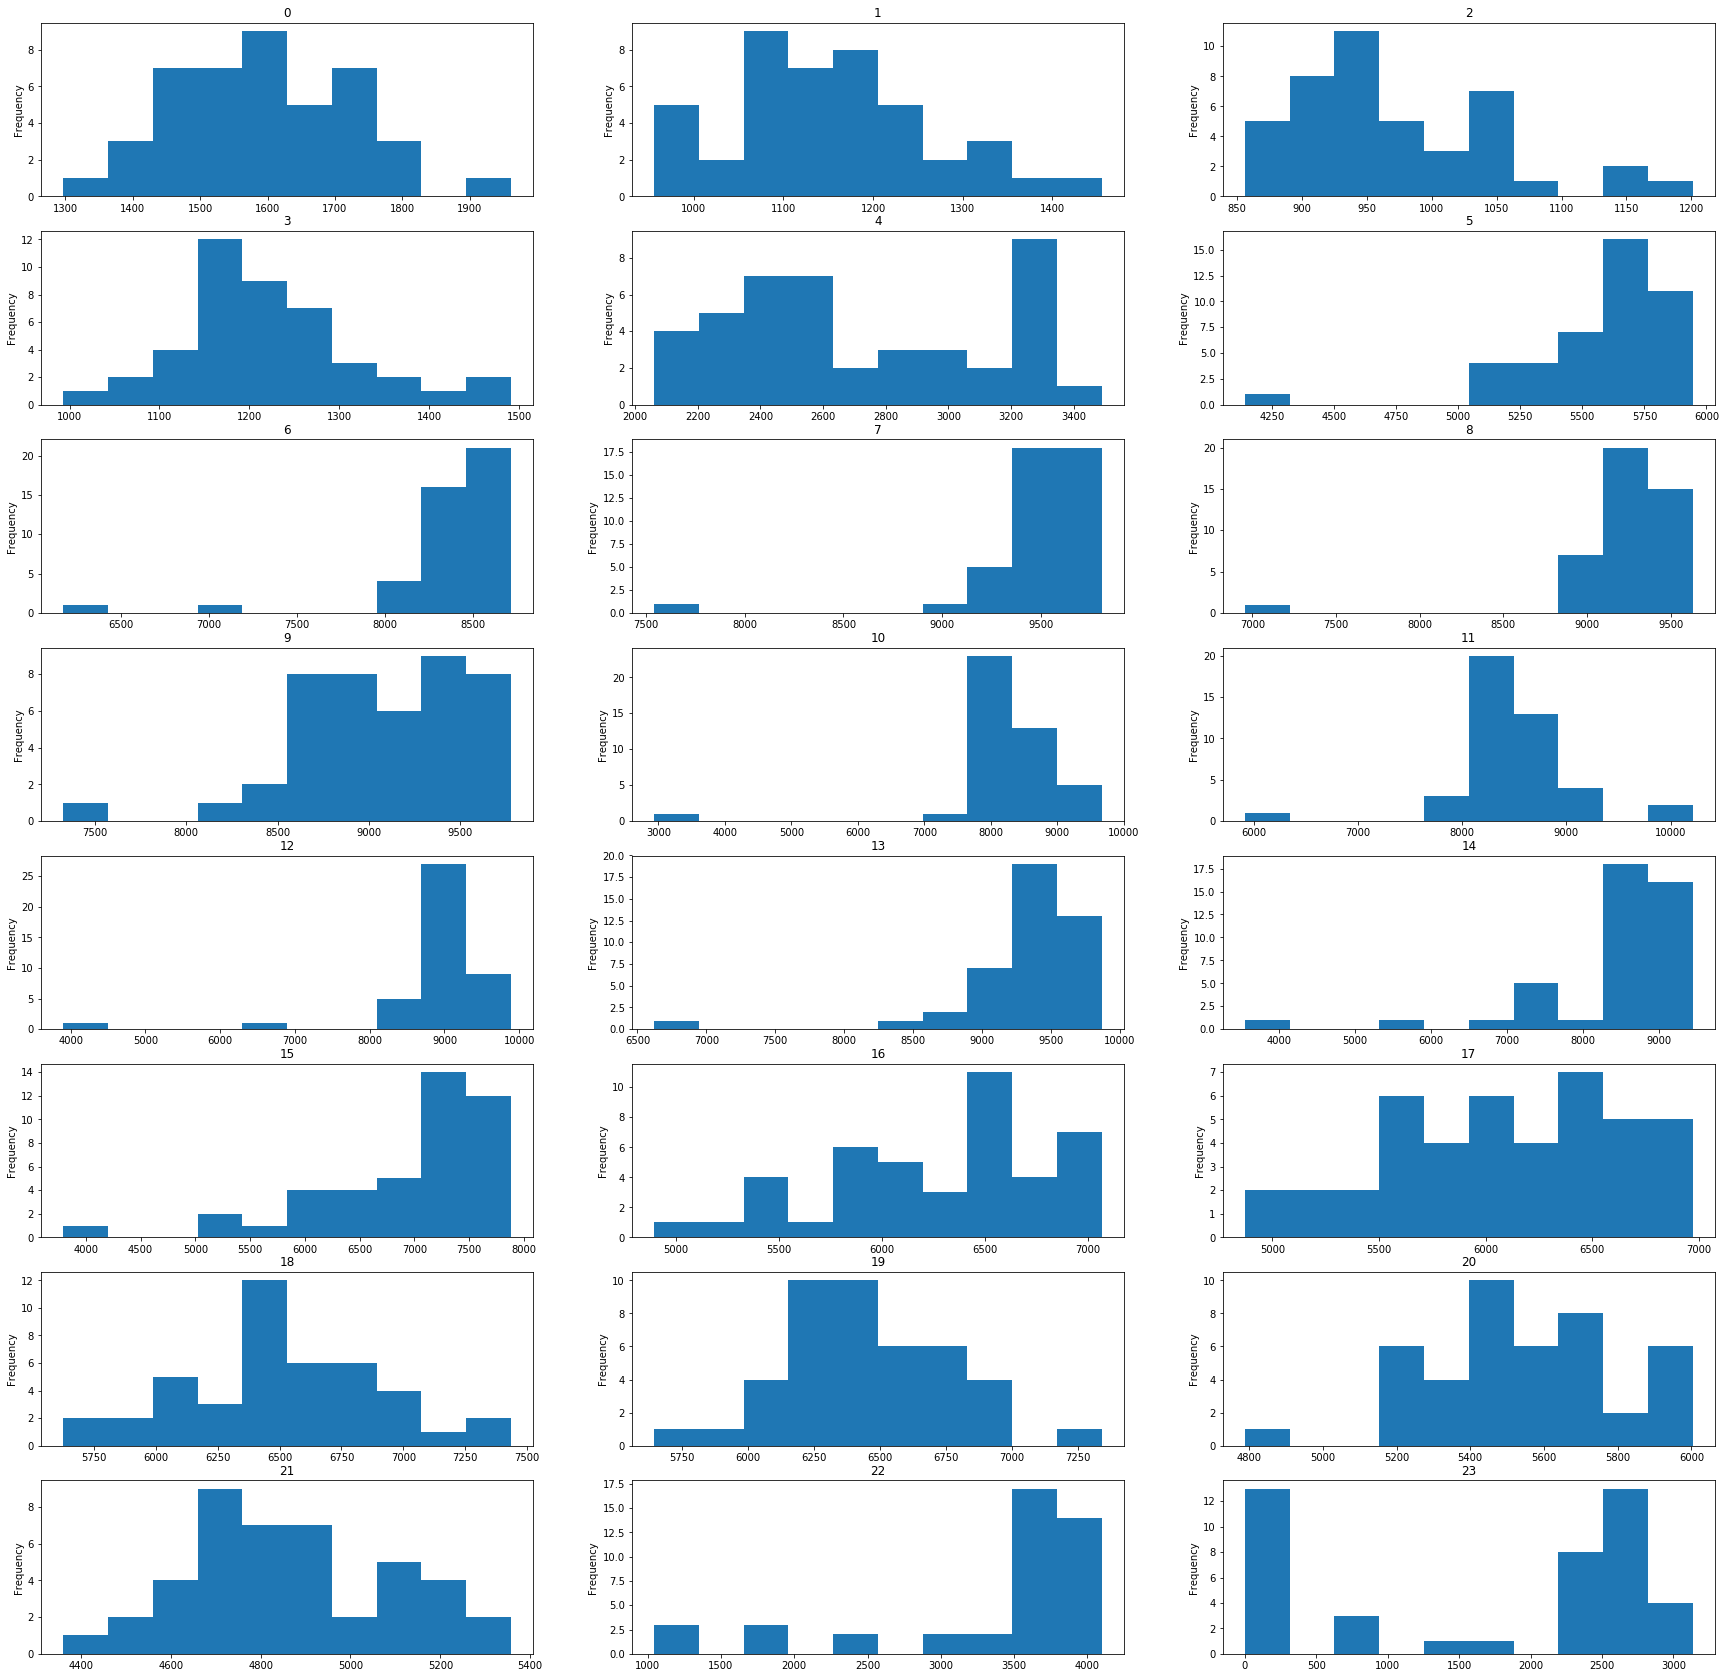

In [170]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_m['0'].plot.hist(ax=ax1,title='0')
df_139_m['1'].plot.hist(ax=ax2,title='1')
df_139_m['2'].plot.hist(ax=ax3,title='2')
df_139_m['3'].plot.hist(ax=ax4,title='3')
df_139_m['4'].plot.hist(ax=ax5,title='4')
df_139_m['5'].plot.hist(ax=ax6,title='5')
df_139_m['6'].plot.hist(ax=ax7,title='6')
df_139_m['7'].plot.hist(ax=ax8,title='7')
df_139_m['8'].plot.hist(ax=ax9,title='8')
df_139_m['9'].plot.hist(ax=ax10,title='9')
df_139_m['10'].plot.hist(ax=ax11,title='10')
df_139_m['11'].plot.hist(ax=ax12,title='11')
df_139_m['12'].plot.hist(ax=ax13,title='12')
df_139_m['13'].plot.hist(ax=ax14,title='13')
df_139_m['14'].plot.hist(ax=ax15,title='14')
df_139_m['15'].plot.hist(ax=ax16,title='15')
df_139_m['16'].plot.hist(ax=ax17,title='16')
df_139_m['17'].plot.hist(ax=ax18,title='17')
df_139_m['18'].plot.hist(ax=ax19,title='18')
df_139_m['19'].plot.hist(ax=ax20,title='19')
df_139_m['20'].plot.hist(ax=ax21,title='20')
df_139_m['21'].plot.hist(ax=ax22,title='21')
df_139_m['22'].plot.hist(ax=ax23,title='22')
df_139_m['23'].plot.hist(ax=ax24,title='23')


### Monday (HOV)

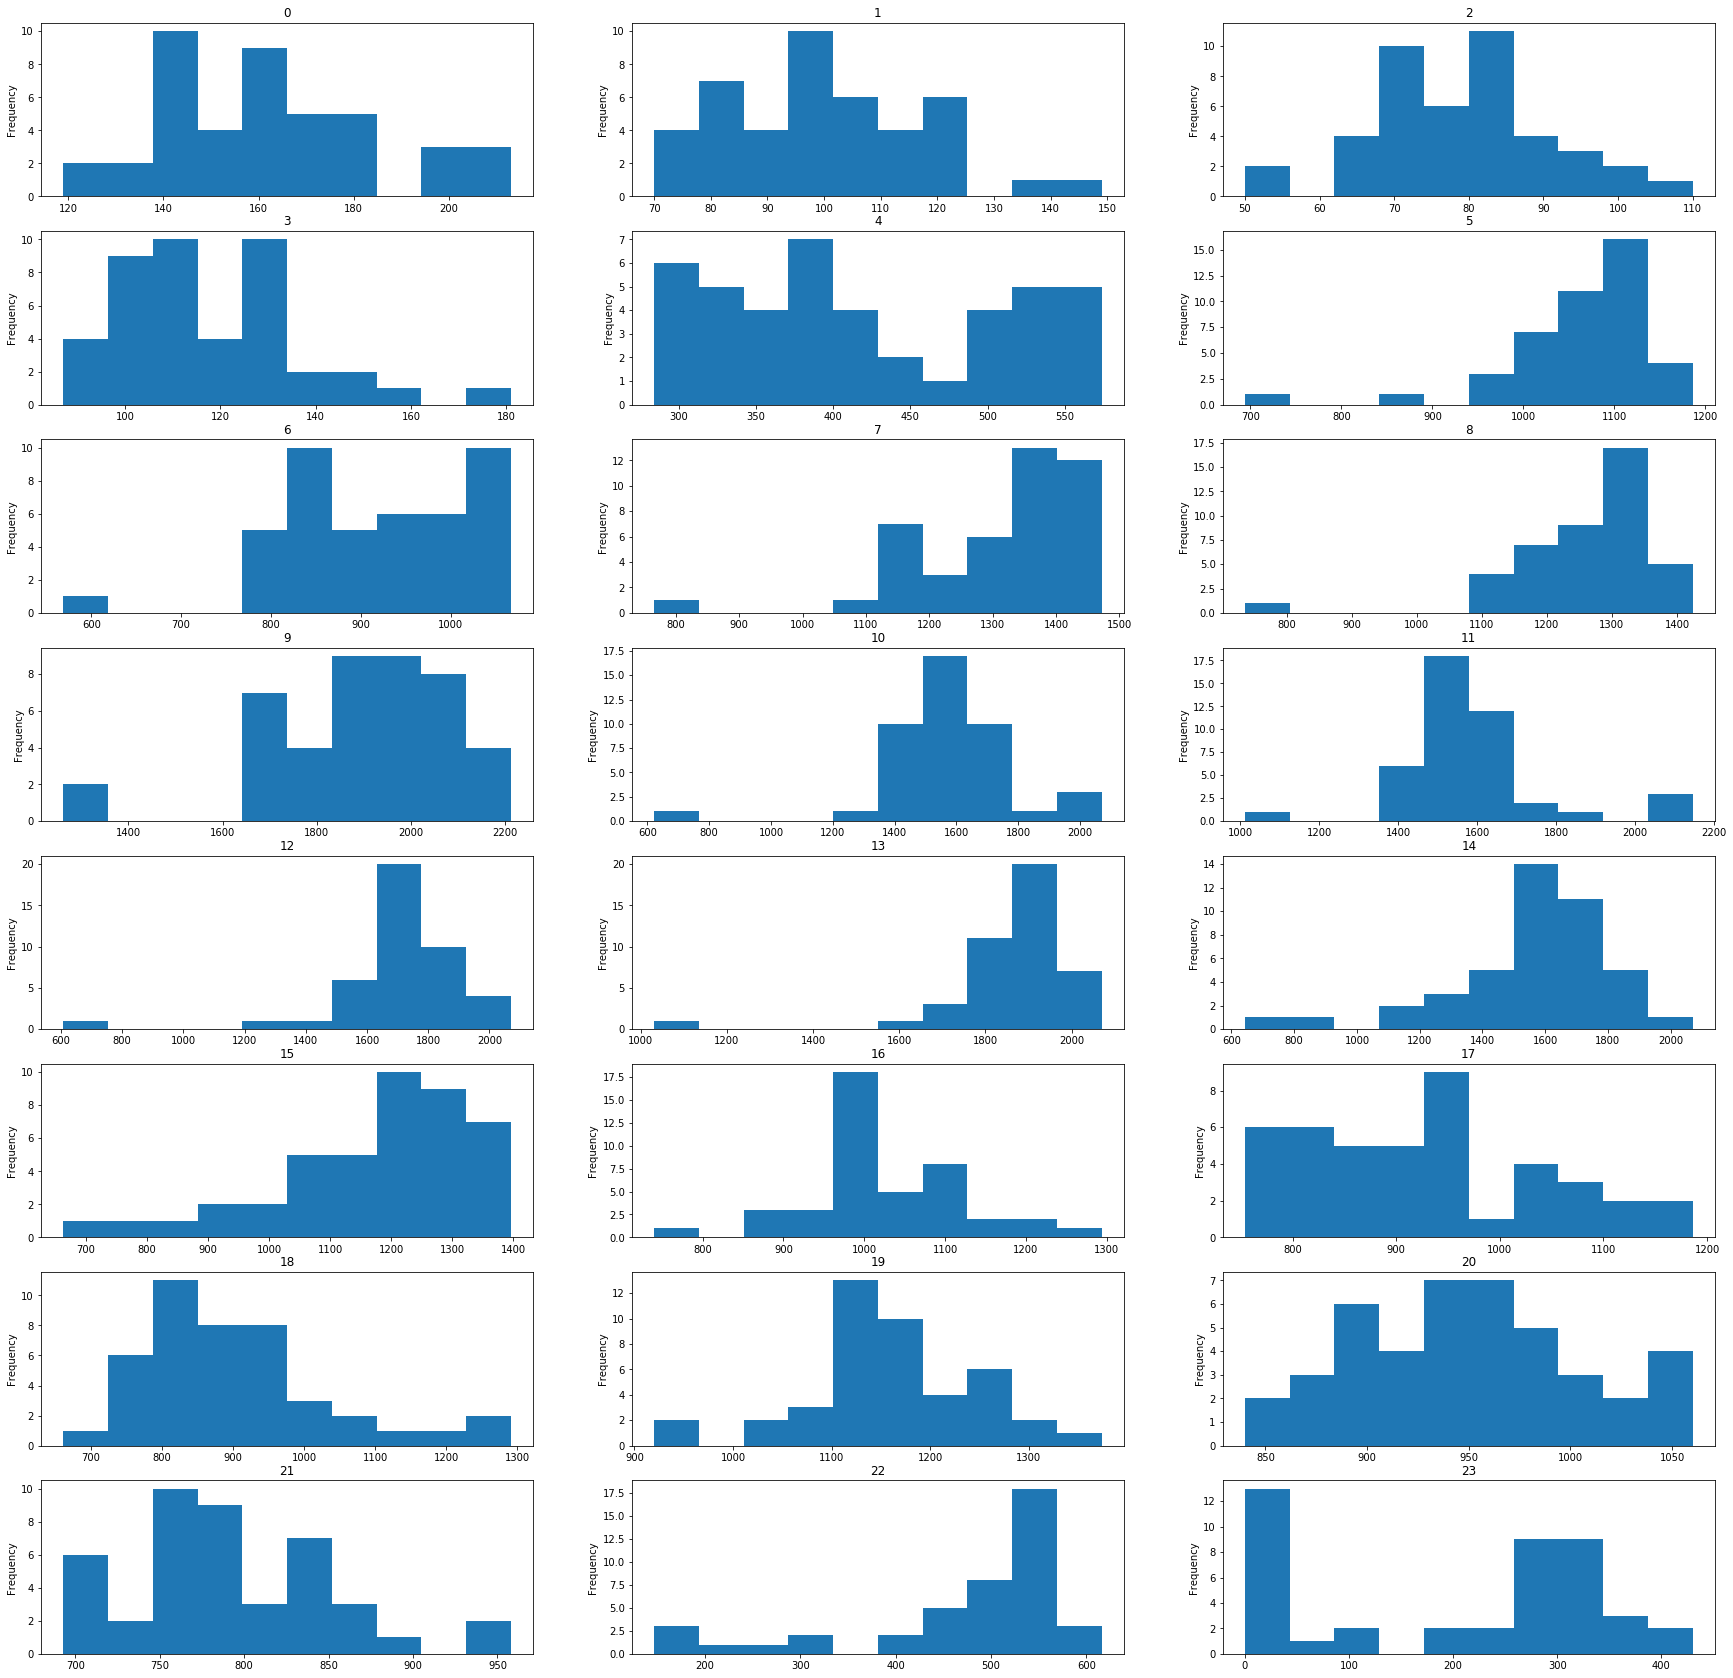

In [144]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_m['0'].plot.hist(ax=ax1,title='0')
df_139_m['1'].plot.hist(ax=ax2,title='1')
df_139_m['2'].plot.hist(ax=ax3,title='2')
df_139_m['3'].plot.hist(ax=ax4,title='3')
df_139_m['4'].plot.hist(ax=ax5,title='4')
df_139_m['5'].plot.hist(ax=ax6,title='5')
df_139_m['6'].plot.hist(ax=ax7,title='6')
df_139_m['7'].plot.hist(ax=ax8,title='7')
df_139_m['8'].plot.hist(ax=ax9,title='8')
df_139_m['9'].plot.hist(ax=ax10,title='9')
df_139_m['10'].plot.hist(ax=ax11,title='10')
df_139_m['11'].plot.hist(ax=ax12,title='11')
df_139_m['12'].plot.hist(ax=ax13,title='12')
df_139_m['13'].plot.hist(ax=ax14,title='13')
df_139_m['14'].plot.hist(ax=ax15,title='14')
df_139_m['15'].plot.hist(ax=ax16,title='15')
df_139_m['16'].plot.hist(ax=ax17,title='16')
df_139_m['17'].plot.hist(ax=ax18,title='17')
df_139_m['18'].plot.hist(ax=ax19,title='18')
df_139_m['19'].plot.hist(ax=ax20,title='19')
df_139_m['20'].plot.hist(ax=ax21,title='20')
df_139_m['21'].plot.hist(ax=ax22,title='21')
df_139_m['22'].plot.hist(ax=ax23,title='22')
df_139_m['23'].plot.hist(ax=ax24,title='23')

### Monday Lane1

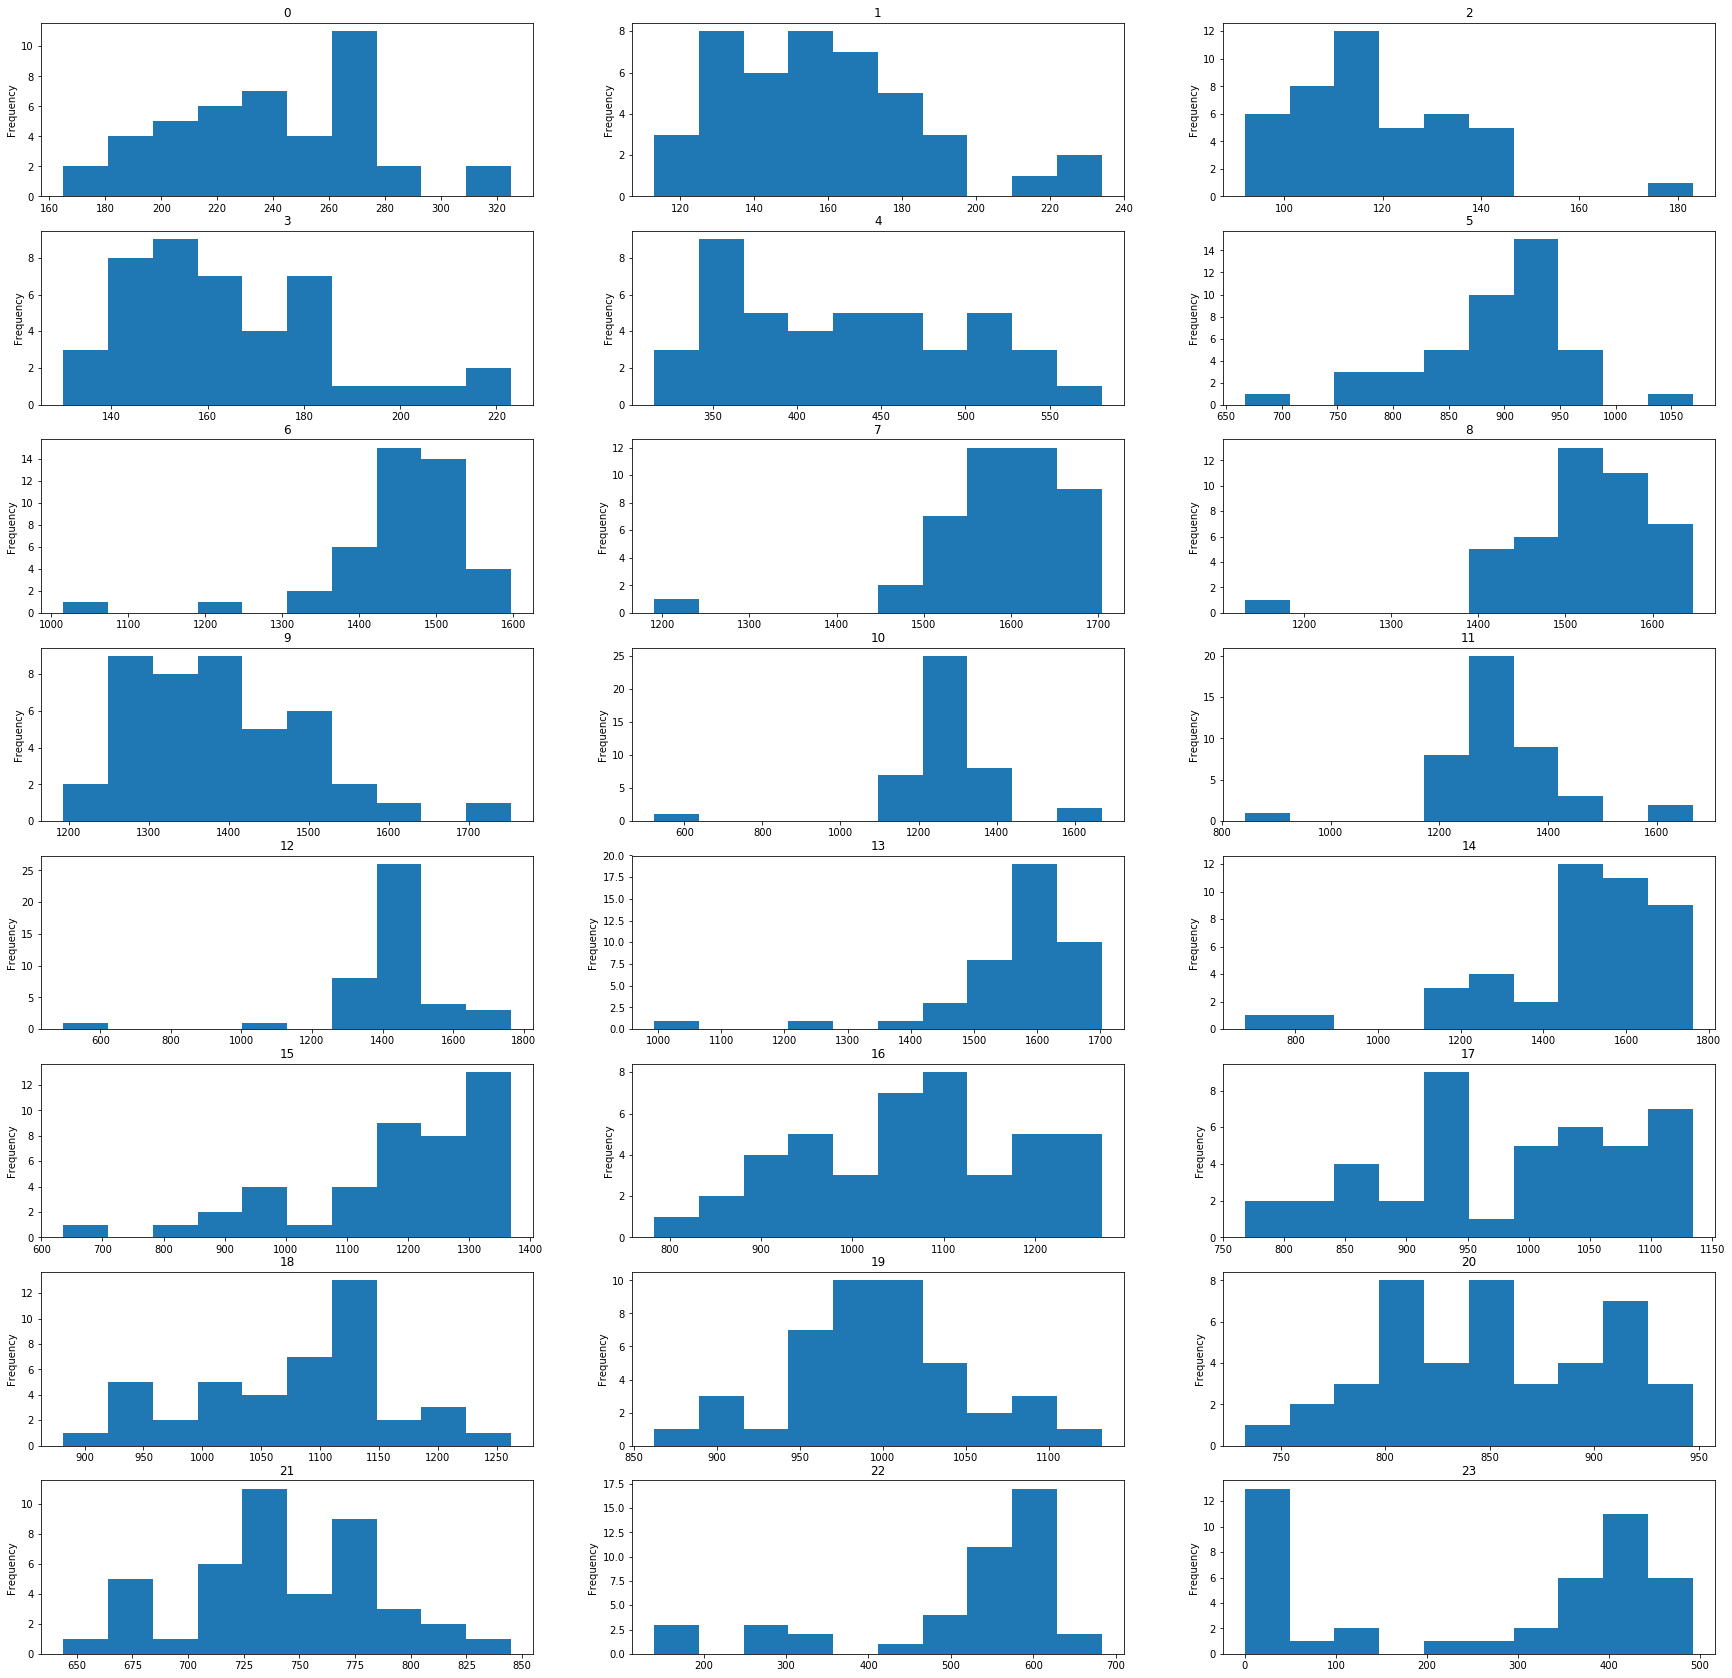

In [161]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_m['0'].plot.hist(ax=ax1,title='0')
df_139_m['1'].plot.hist(ax=ax2,title='1')
df_139_m['2'].plot.hist(ax=ax3,title='2')
df_139_m['3'].plot.hist(ax=ax4,title='3')
df_139_m['4'].plot.hist(ax=ax5,title='4')
df_139_m['5'].plot.hist(ax=ax6,title='5')
df_139_m['6'].plot.hist(ax=ax7,title='6')
df_139_m['7'].plot.hist(ax=ax8,title='7')
df_139_m['8'].plot.hist(ax=ax9,title='8')
df_139_m['9'].plot.hist(ax=ax10,title='9')
df_139_m['10'].plot.hist(ax=ax11,title='10')
df_139_m['11'].plot.hist(ax=ax12,title='11')
df_139_m['12'].plot.hist(ax=ax13,title='12')
df_139_m['13'].plot.hist(ax=ax14,title='13')
df_139_m['14'].plot.hist(ax=ax15,title='14')
df_139_m['15'].plot.hist(ax=ax16,title='15')
df_139_m['16'].plot.hist(ax=ax17,title='16')
df_139_m['17'].plot.hist(ax=ax18,title='17')
df_139_m['18'].plot.hist(ax=ax19,title='18')
df_139_m['19'].plot.hist(ax=ax20,title='19')
df_139_m['20'].plot.hist(ax=ax21,title='20')
df_139_m['21'].plot.hist(ax=ax22,title='21')
df_139_m['22'].plot.hist(ax=ax23,title='22')
df_139_m['23'].plot.hist(ax=ax24,title='23')

### Tuesday

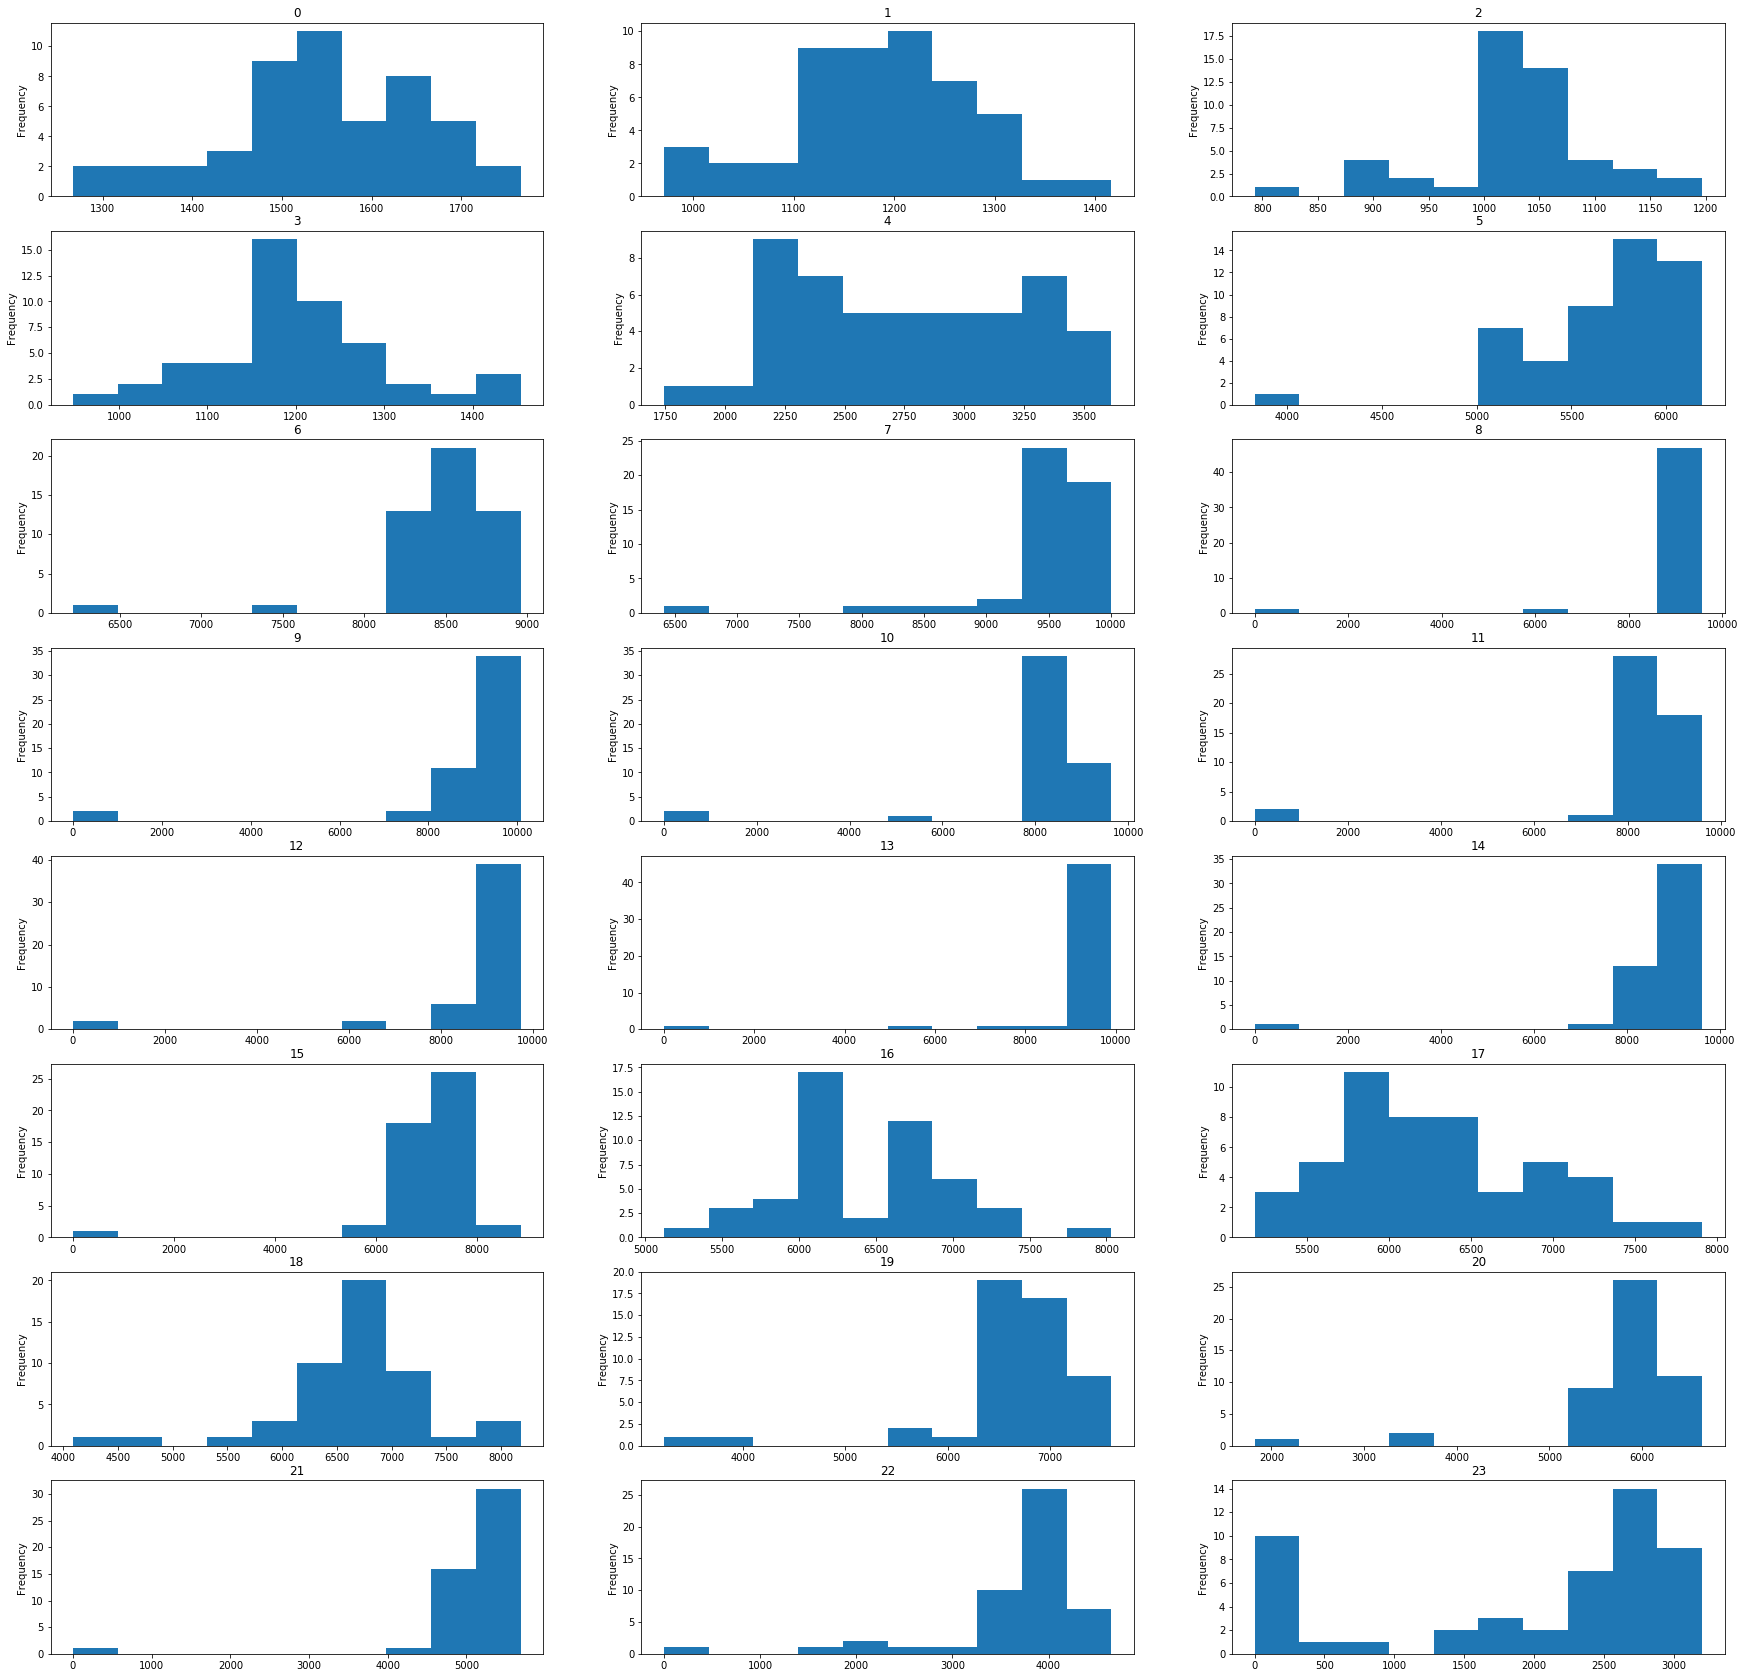

In [171]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_t['0'].plot.hist(ax=ax1,title='0')
df_139_t['1'].plot.hist(ax=ax2,title='1')
df_139_t['2'].plot.hist(ax=ax3,title='2')
df_139_t['3'].plot.hist(ax=ax4,title='3')
df_139_t['4'].plot.hist(ax=ax5,title='4')
df_139_t['5'].plot.hist(ax=ax6,title='5')
df_139_t['6'].plot.hist(ax=ax7,title='6')
df_139_t['7'].plot.hist(ax=ax8,title='7')
df_139_t['8'].plot.hist(ax=ax9,title='8')
df_139_t['9'].plot.hist(ax=ax10,title='9')
df_139_t['10'].plot.hist(ax=ax11,title='10')
df_139_t['11'].plot.hist(ax=ax12,title='11')
df_139_t['12'].plot.hist(ax=ax13,title='12')
df_139_t['13'].plot.hist(ax=ax14,title='13')
df_139_t['14'].plot.hist(ax=ax15,title='14')
df_139_t['15'].plot.hist(ax=ax16,title='15')
df_139_t['16'].plot.hist(ax=ax17,title='16')
df_139_t['17'].plot.hist(ax=ax18,title='17')
df_139_t['18'].plot.hist(ax=ax19,title='18')
df_139_t['19'].plot.hist(ax=ax20,title='19')
df_139_t['20'].plot.hist(ax=ax21,title='20')
df_139_t['21'].plot.hist(ax=ax22,title='21')
df_139_t['22'].plot.hist(ax=ax23,title='22')
df_139_t['23'].plot.hist(ax=ax24,title='23')


### Tuesday HOV

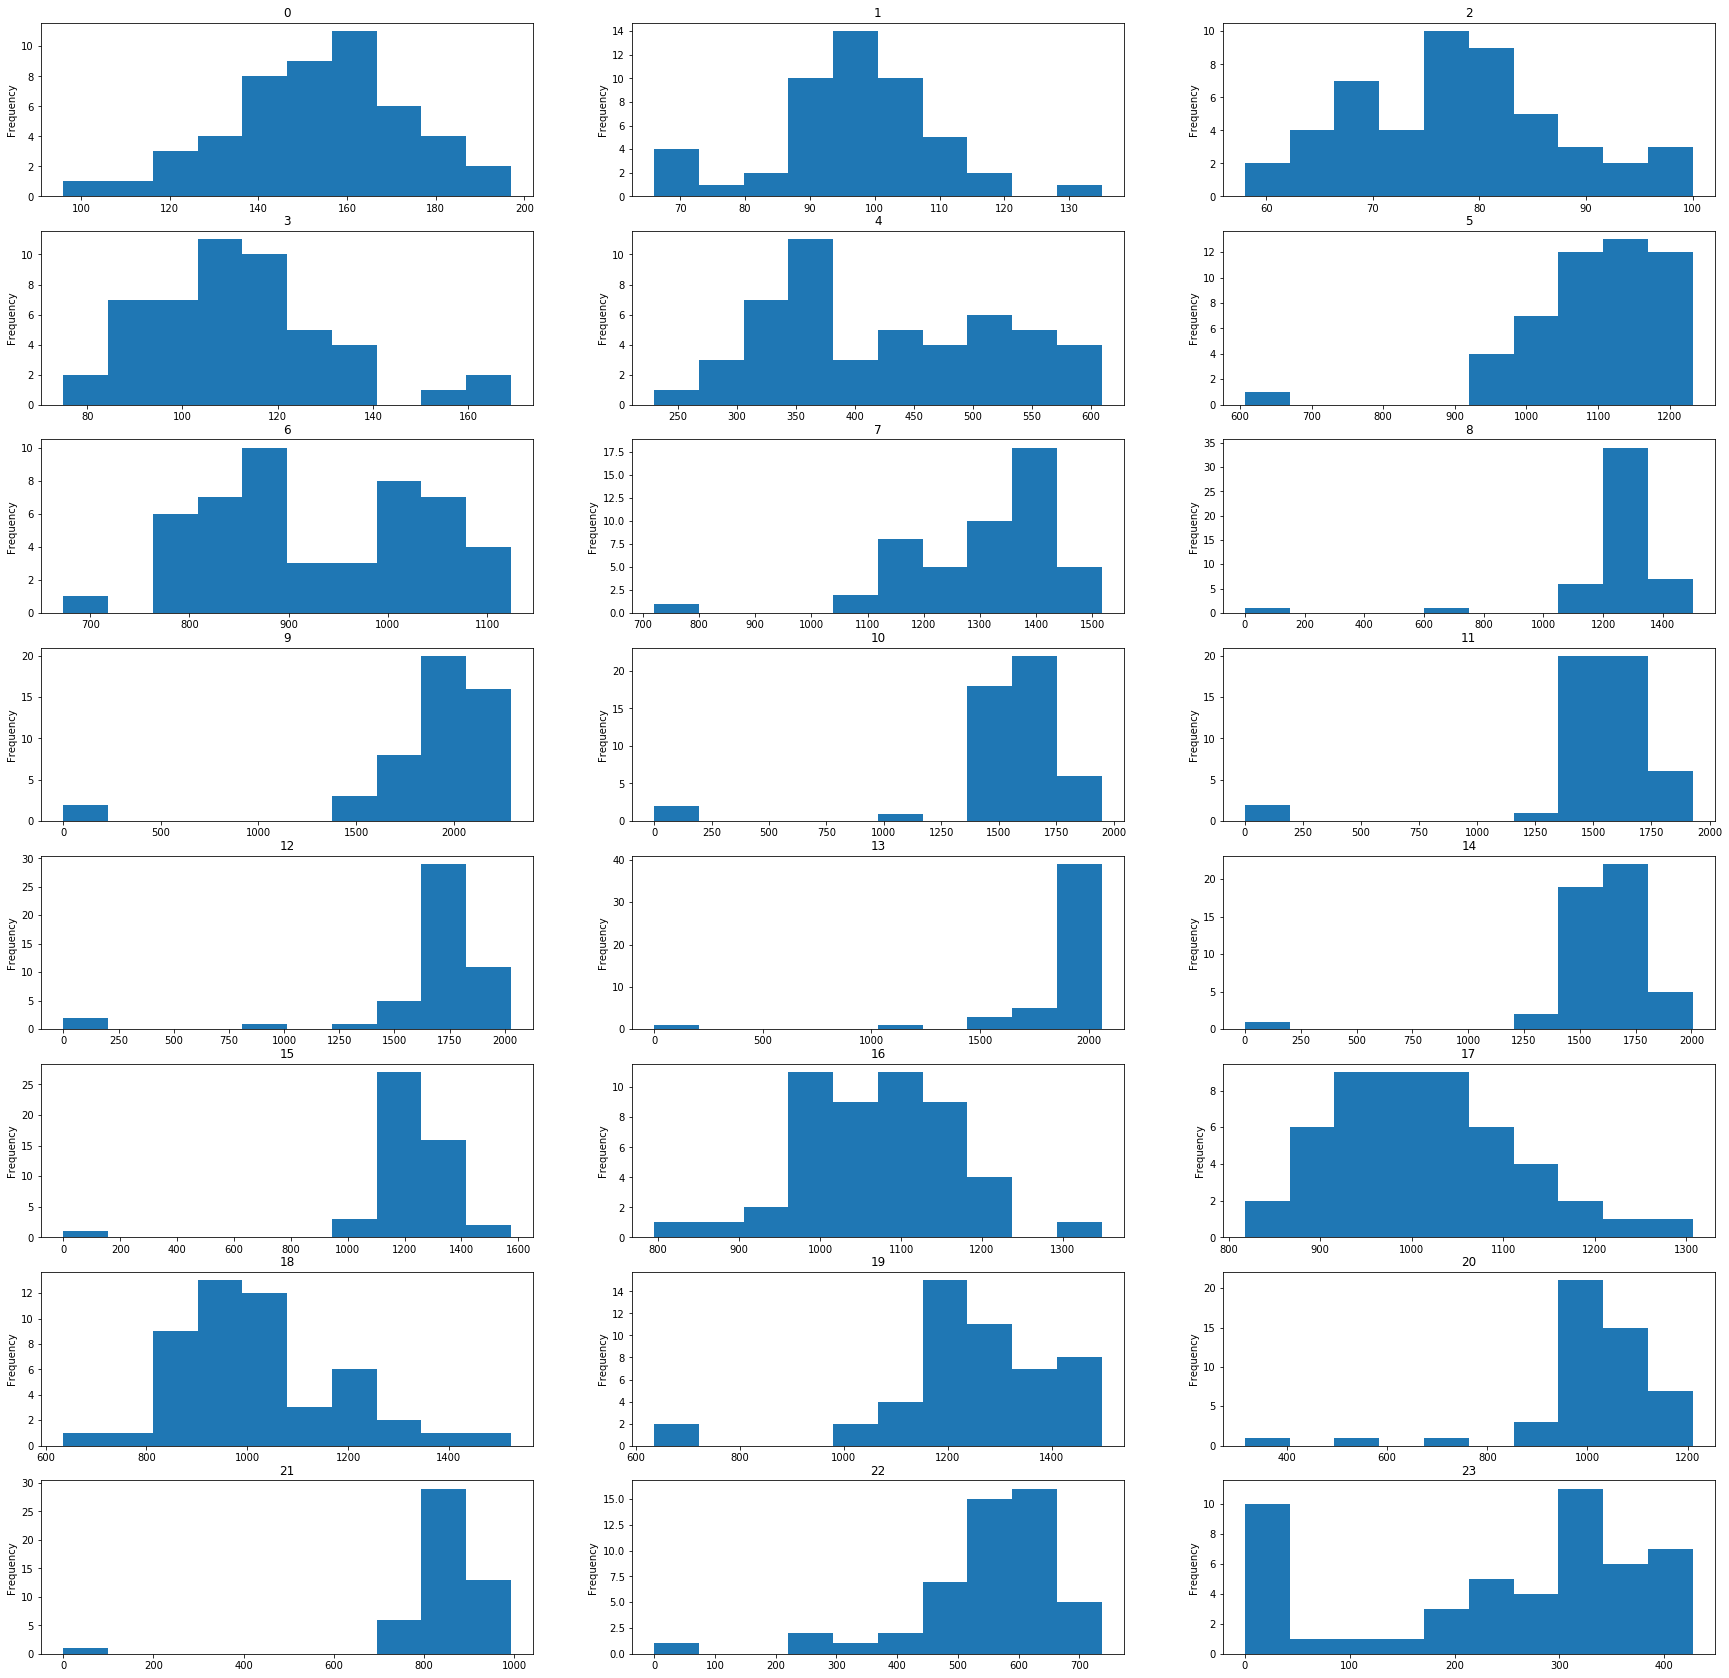

In [145]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_t['0'].plot.hist(ax=ax1,title='0')
df_139_t['1'].plot.hist(ax=ax2,title='1')
df_139_t['2'].plot.hist(ax=ax3,title='2')
df_139_t['3'].plot.hist(ax=ax4,title='3')
df_139_t['4'].plot.hist(ax=ax5,title='4')
df_139_t['5'].plot.hist(ax=ax6,title='5')
df_139_t['6'].plot.hist(ax=ax7,title='6')
df_139_t['7'].plot.hist(ax=ax8,title='7')
df_139_t['8'].plot.hist(ax=ax9,title='8')
df_139_t['9'].plot.hist(ax=ax10,title='9')
df_139_t['10'].plot.hist(ax=ax11,title='10')
df_139_t['11'].plot.hist(ax=ax12,title='11')
df_139_t['12'].plot.hist(ax=ax13,title='12')
df_139_t['13'].plot.hist(ax=ax14,title='13')
df_139_t['14'].plot.hist(ax=ax15,title='14')
df_139_t['15'].plot.hist(ax=ax16,title='15')
df_139_t['16'].plot.hist(ax=ax17,title='16')
df_139_t['17'].plot.hist(ax=ax18,title='17')
df_139_t['18'].plot.hist(ax=ax19,title='18')
df_139_t['19'].plot.hist(ax=ax20,title='19')
df_139_t['20'].plot.hist(ax=ax21,title='20')
df_139_t['21'].plot.hist(ax=ax22,title='21')
df_139_t['22'].plot.hist(ax=ax23,title='22')
df_139_t['23'].plot.hist(ax=ax24,title='23')

### Tuesday Lane1

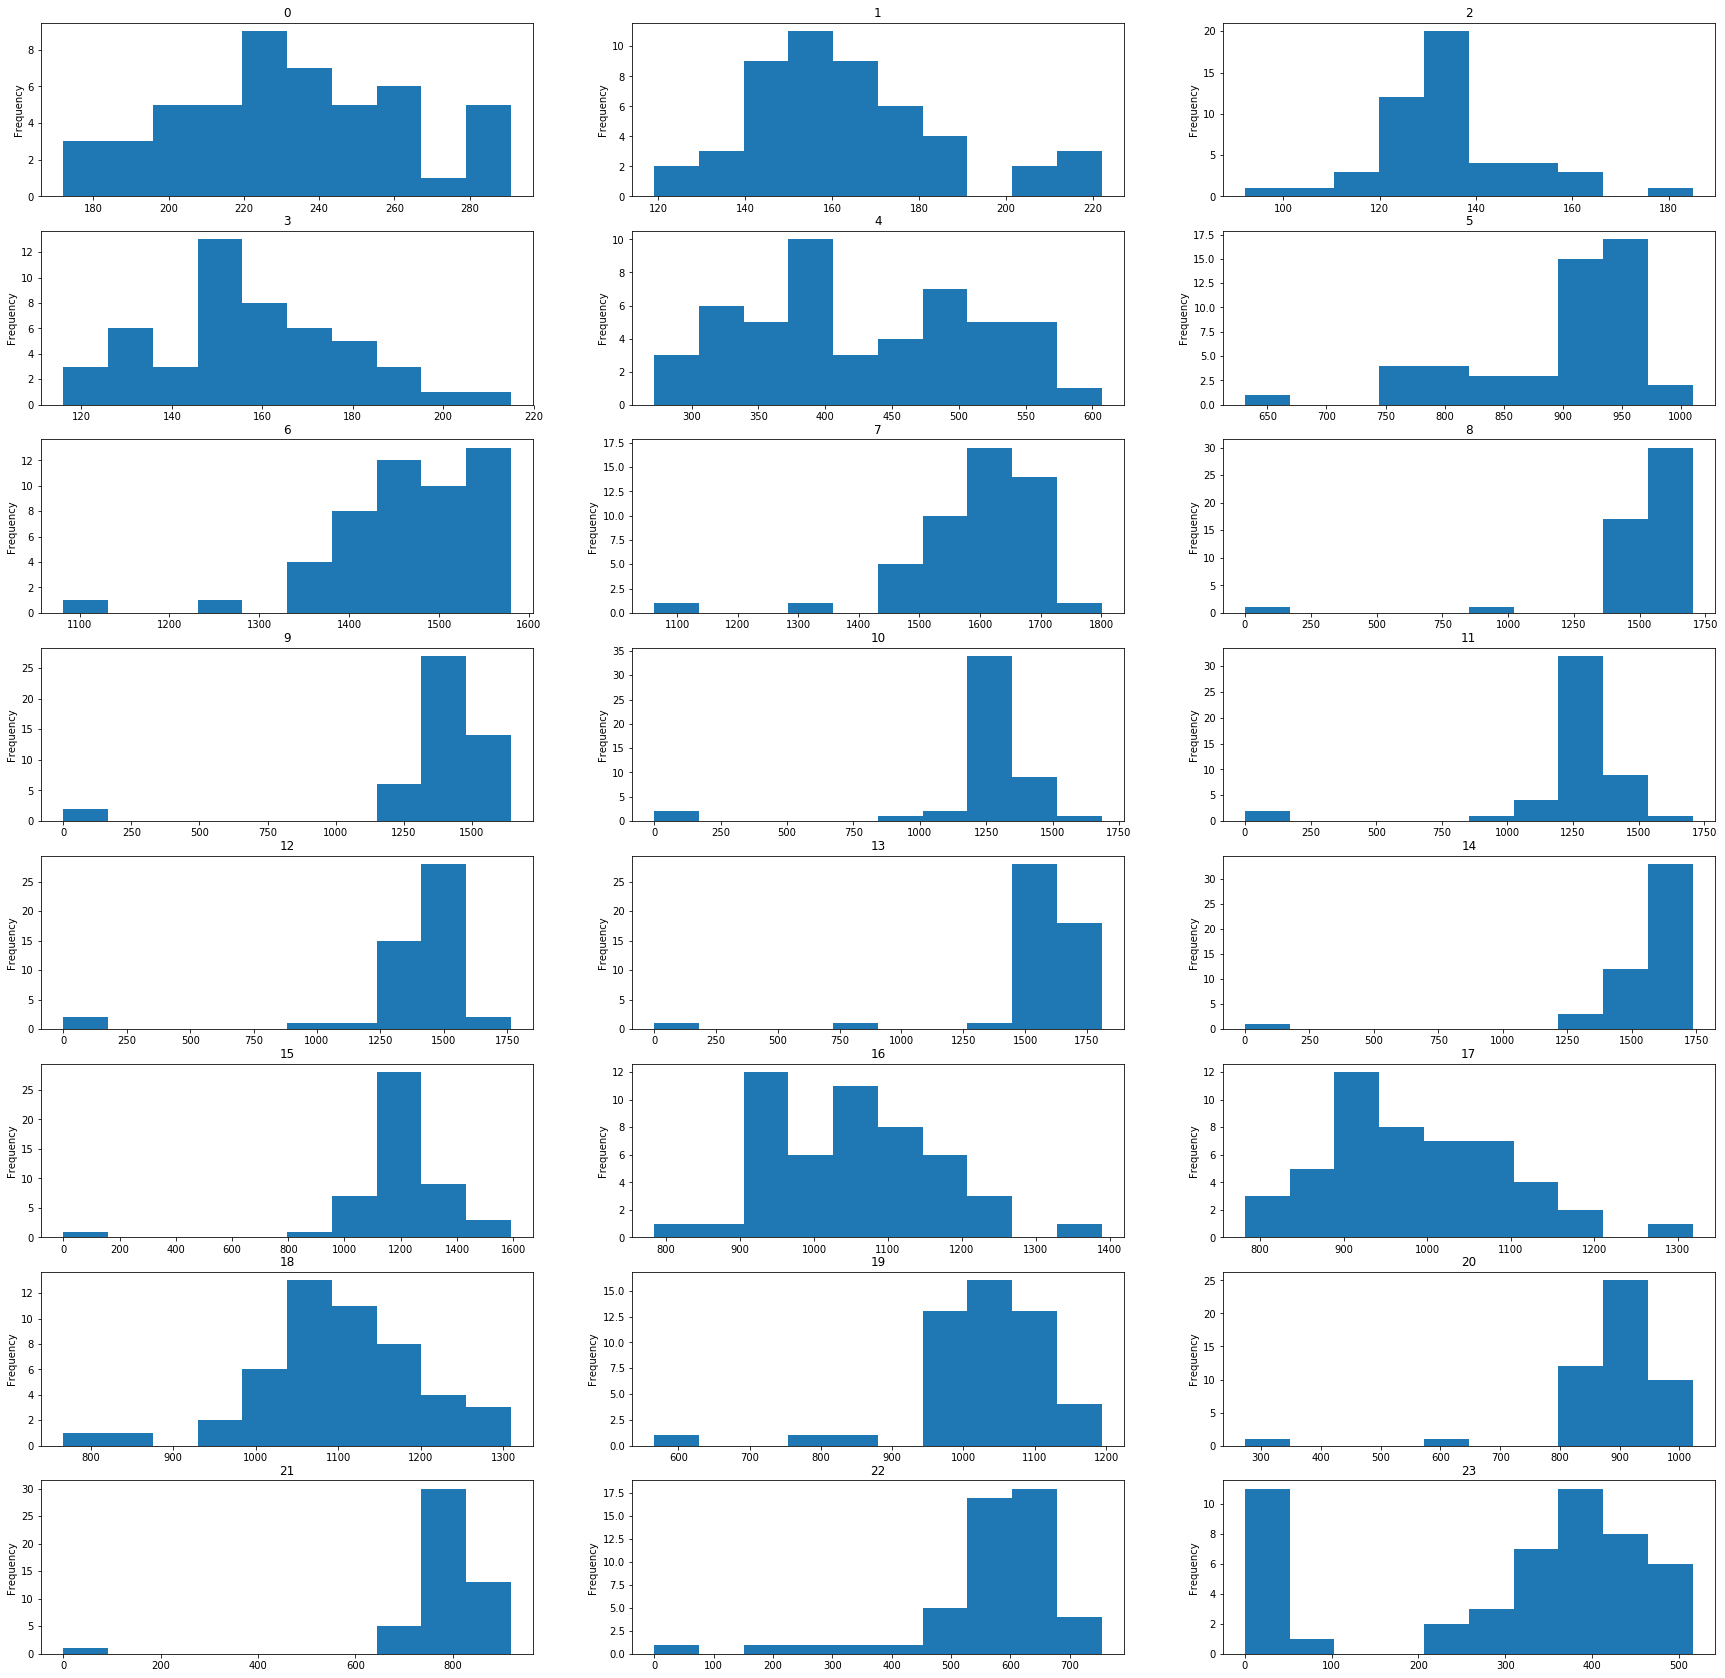

In [162]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_t['0'].plot.hist(ax=ax1,title='0')
df_139_t['1'].plot.hist(ax=ax2,title='1')
df_139_t['2'].plot.hist(ax=ax3,title='2')
df_139_t['3'].plot.hist(ax=ax4,title='3')
df_139_t['4'].plot.hist(ax=ax5,title='4')
df_139_t['5'].plot.hist(ax=ax6,title='5')
df_139_t['6'].plot.hist(ax=ax7,title='6')
df_139_t['7'].plot.hist(ax=ax8,title='7')
df_139_t['8'].plot.hist(ax=ax9,title='8')
df_139_t['9'].plot.hist(ax=ax10,title='9')
df_139_t['10'].plot.hist(ax=ax11,title='10')
df_139_t['11'].plot.hist(ax=ax12,title='11')
df_139_t['12'].plot.hist(ax=ax13,title='12')
df_139_t['13'].plot.hist(ax=ax14,title='13')
df_139_t['14'].plot.hist(ax=ax15,title='14')
df_139_t['15'].plot.hist(ax=ax16,title='15')
df_139_t['16'].plot.hist(ax=ax17,title='16')
df_139_t['17'].plot.hist(ax=ax18,title='17')
df_139_t['18'].plot.hist(ax=ax19,title='18')
df_139_t['19'].plot.hist(ax=ax20,title='19')
df_139_t['20'].plot.hist(ax=ax21,title='20')
df_139_t['21'].plot.hist(ax=ax22,title='21')
df_139_t['22'].plot.hist(ax=ax23,title='22')
df_139_t['23'].plot.hist(ax=ax24,title='23')

### Saturday

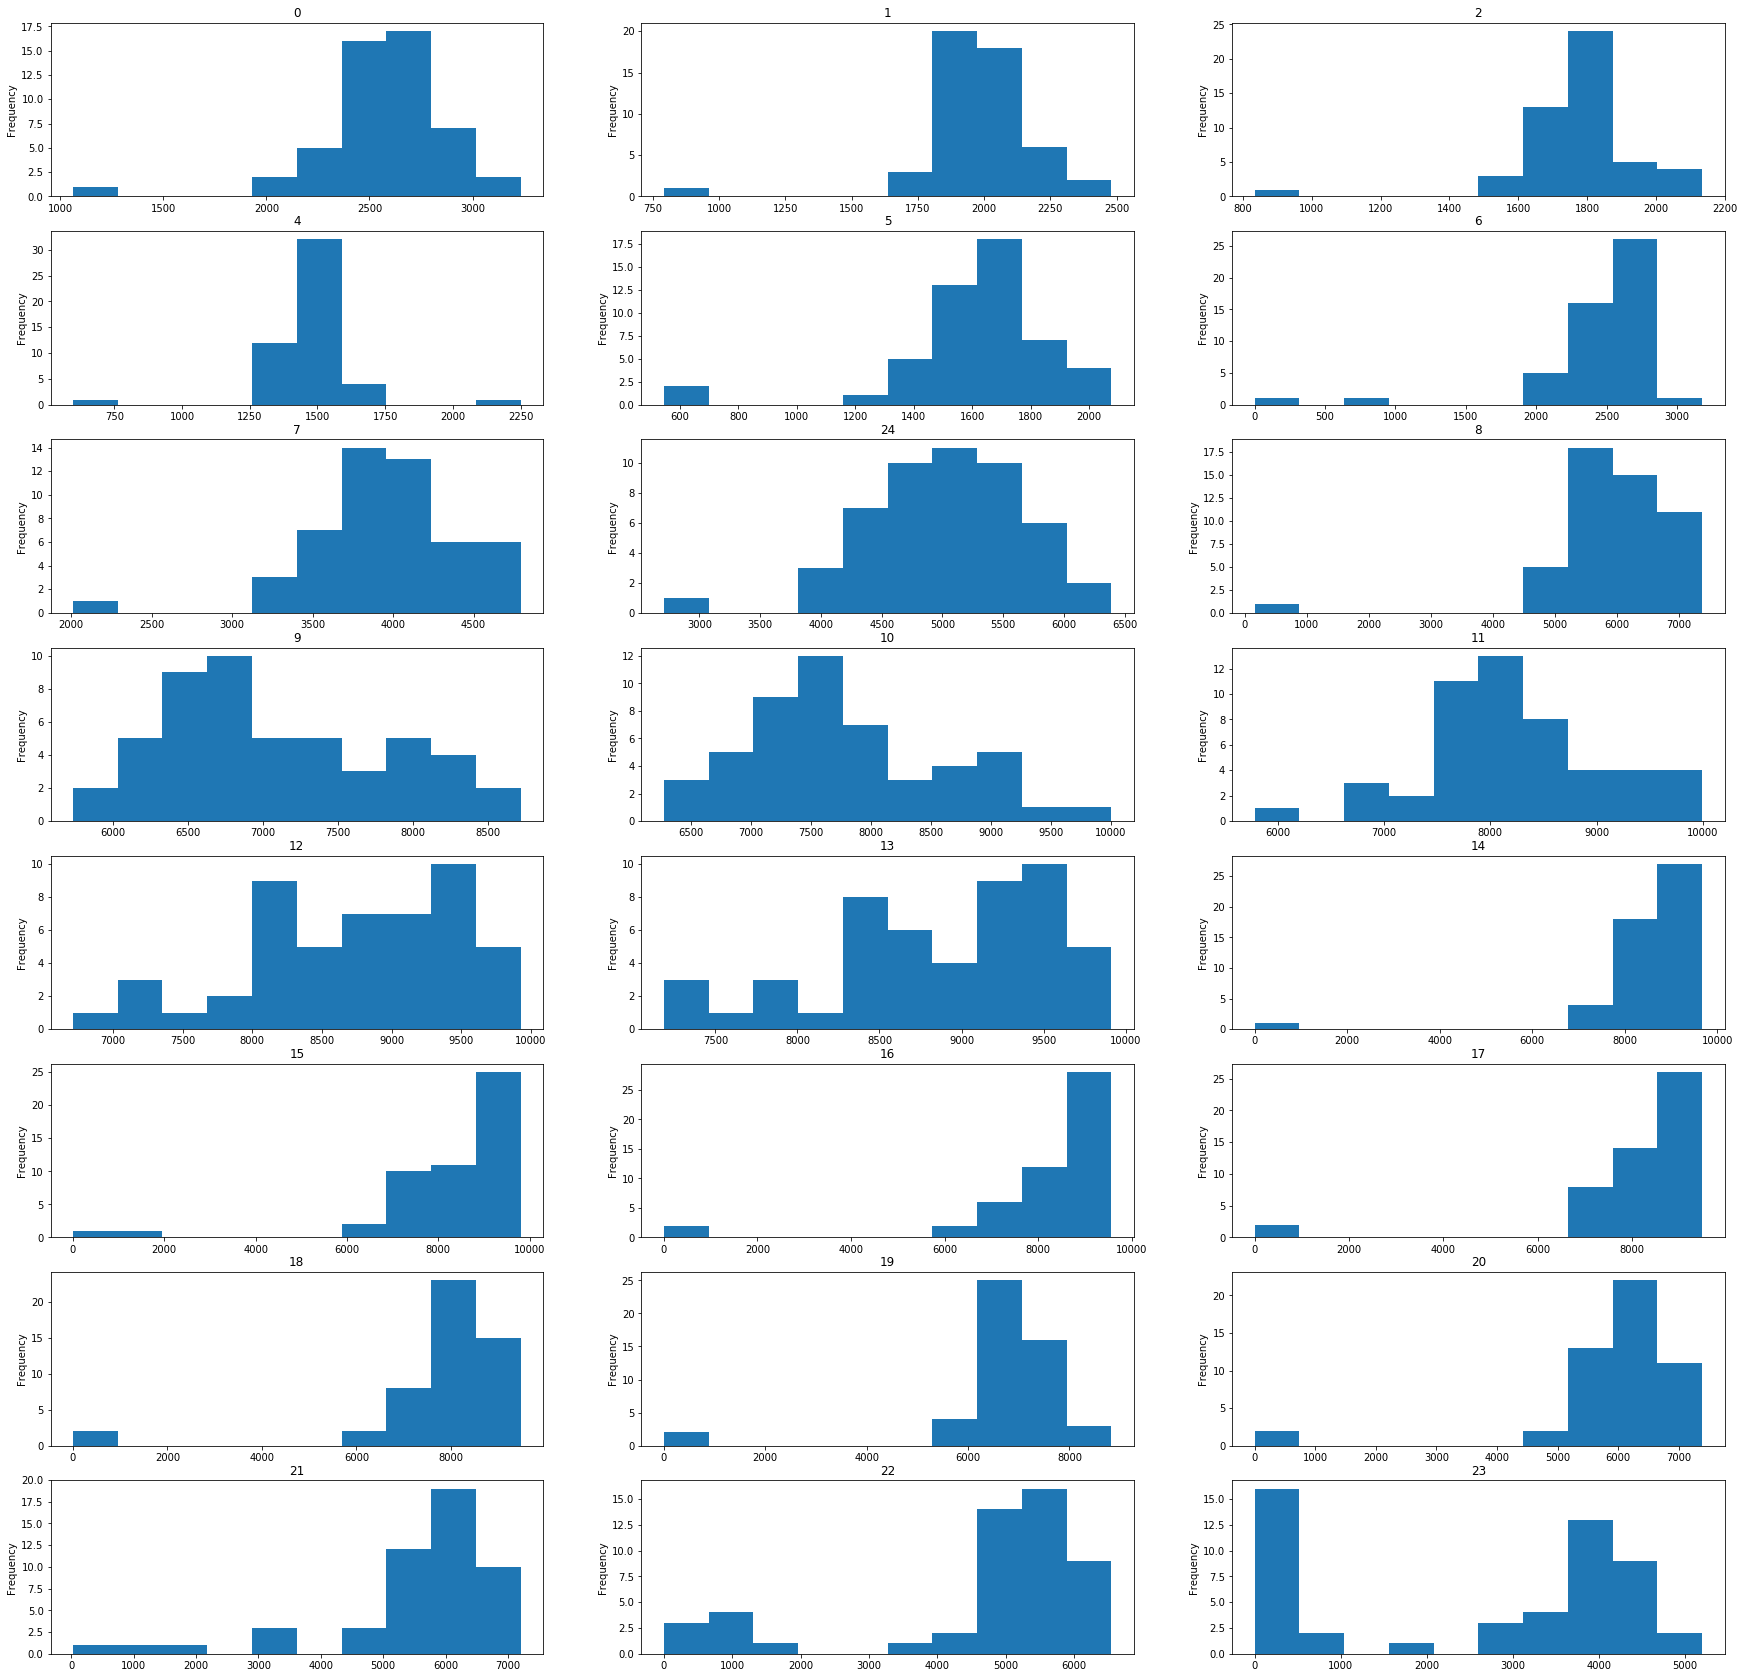

In [172]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sat['0'].plot.hist(ax=ax1,title='0')
df_139_sat['1'].plot.hist(ax=ax2,title='1')
df_139_sat['2'].plot.hist(ax=ax3,title='2')
df_139_sat['3'].plot.hist(ax=ax4,title='4')
df_139_sat['4'].plot.hist(ax=ax5,title='5')
df_139_sat['5'].plot.hist(ax=ax6,title='6')
df_139_sat['6'].plot.hist(ax=ax7,title='7')
df_139_sat['7'].plot.hist(ax=ax8,title='24')
df_139_sat['8'].plot.hist(ax=ax9,title='8')
df_139_sat['9'].plot.hist(ax=ax10,title='9')
df_139_sat['10'].plot.hist(ax=ax11,title='10')
df_139_sat['11'].plot.hist(ax=ax12,title='11')
df_139_sat['12'].plot.hist(ax=ax13,title='12')
df_139_sat['13'].plot.hist(ax=ax14,title='13')
df_139_sat['14'].plot.hist(ax=ax15,title='14')
df_139_sat['15'].plot.hist(ax=ax16,title='15')
df_139_sat['16'].plot.hist(ax=ax17,title='16')
df_139_sat['17'].plot.hist(ax=ax18,title='17')
df_139_sat['18'].plot.hist(ax=ax19,title='18')
df_139_sat['19'].plot.hist(ax=ax20,title='19')
df_139_sat['20'].plot.hist(ax=ax21,title='20')
df_139_sat['21'].plot.hist(ax=ax22,title='21')
df_139_sat['22'].plot.hist(ax=ax23,title='22')
df_139_sat['23'].plot.hist(ax=ax24,title='23')


### Saturday HOV

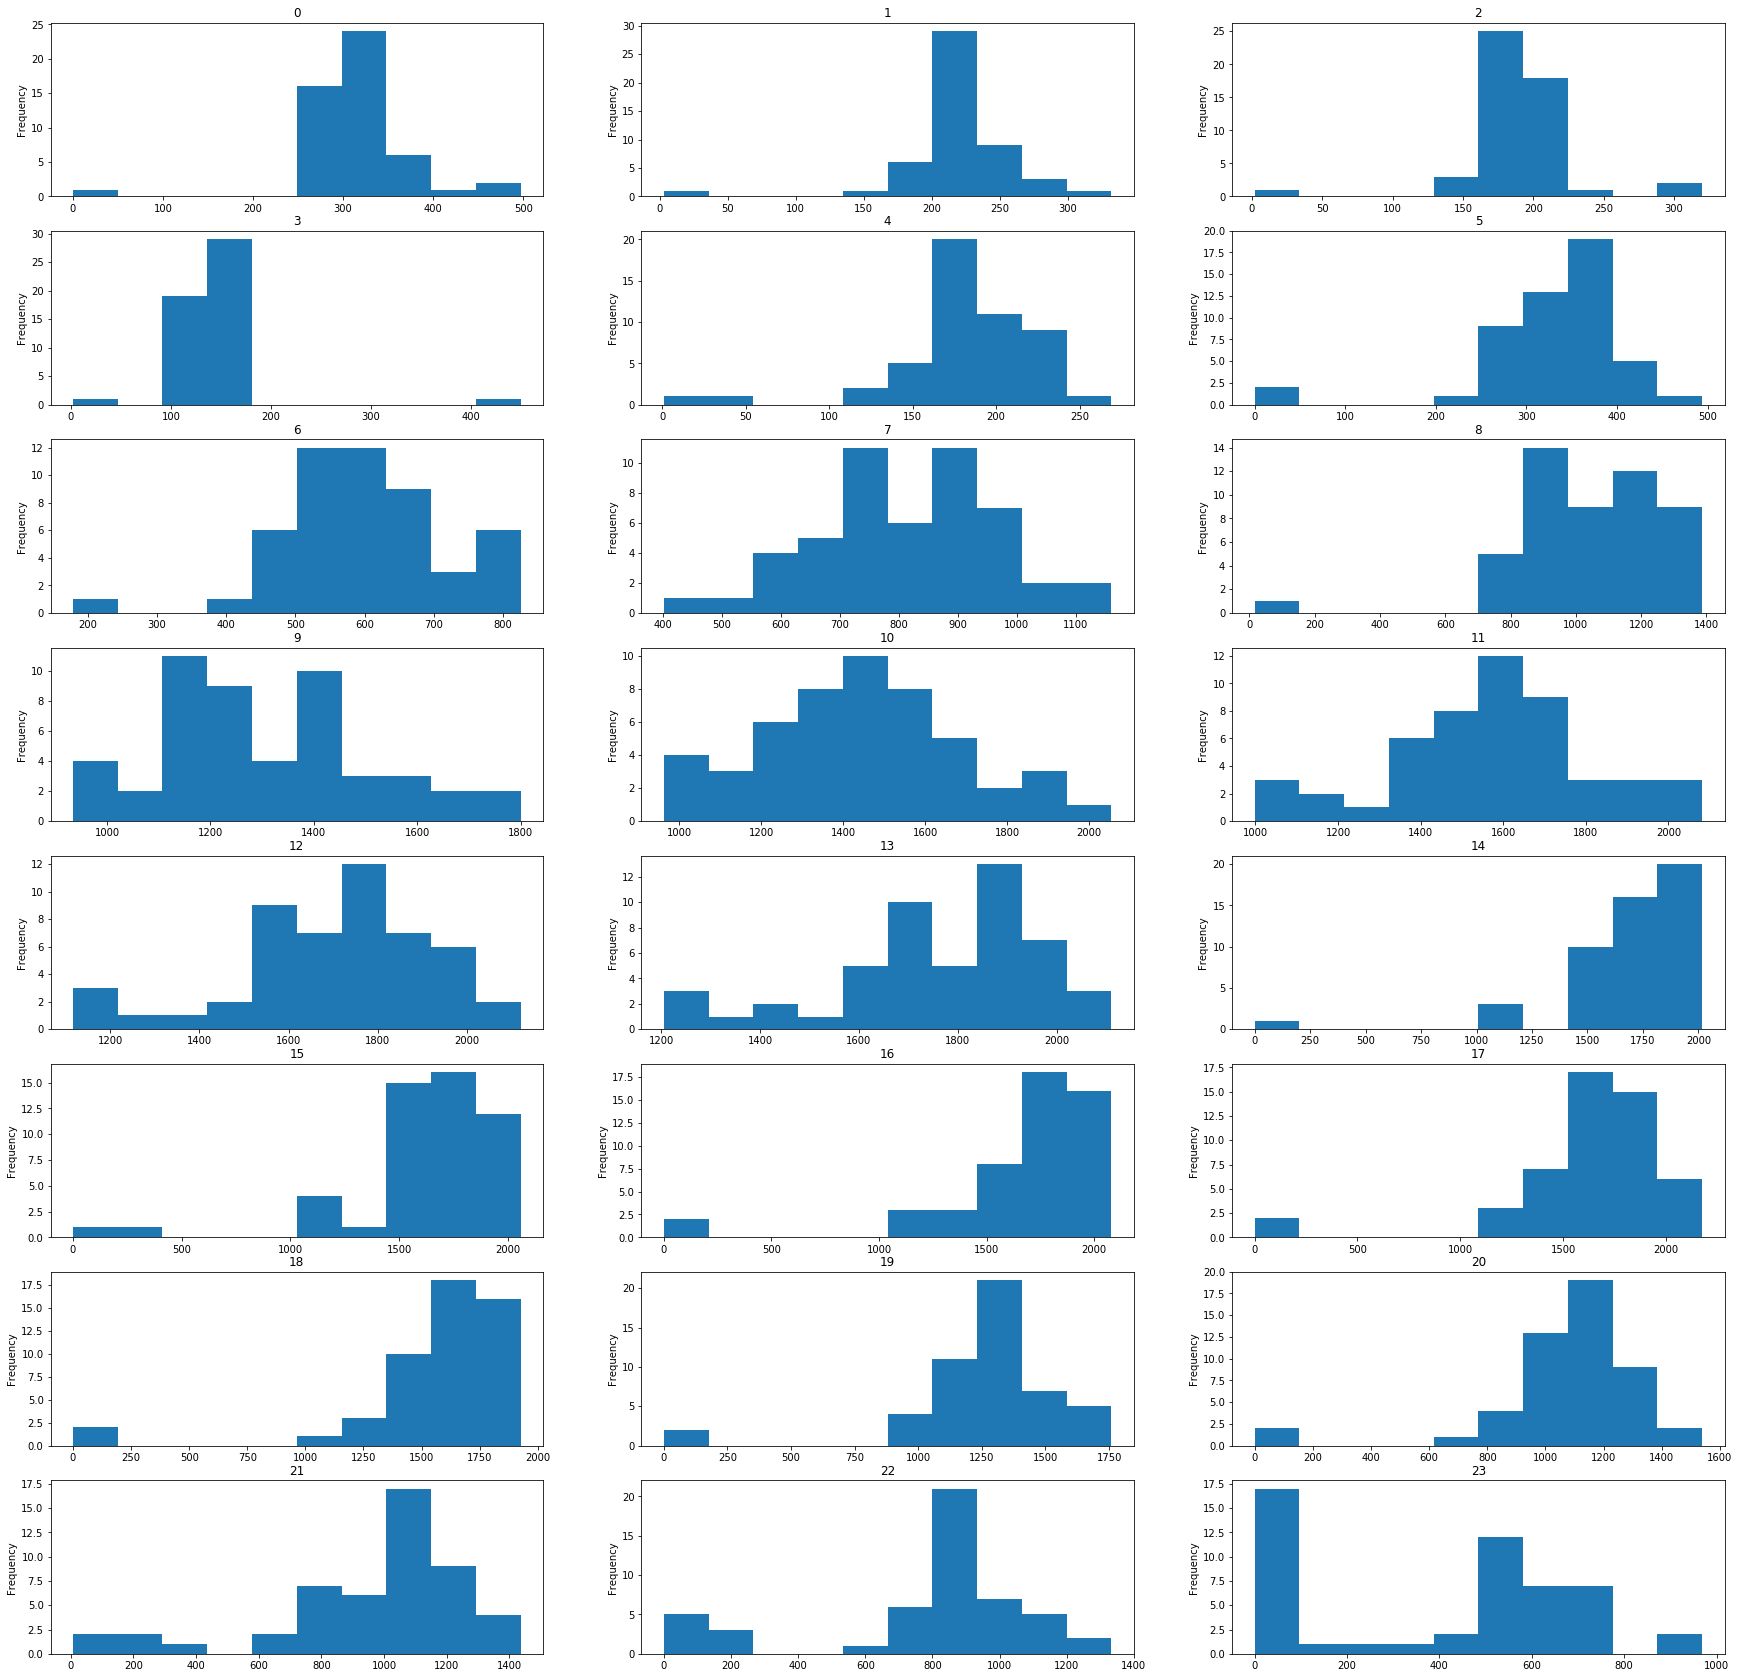

In [146]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sat['0'].plot.hist(ax=ax1,title='0')
df_139_sat['1'].plot.hist(ax=ax2,title='1')
df_139_sat['2'].plot.hist(ax=ax3,title='2')
df_139_sat['3'].plot.hist(ax=ax4,title='3')
df_139_sat['4'].plot.hist(ax=ax5,title='4')
df_139_sat['5'].plot.hist(ax=ax6,title='5')
df_139_sat['6'].plot.hist(ax=ax7,title='6')
df_139_sat['7'].plot.hist(ax=ax8,title='7')
df_139_sat['8'].plot.hist(ax=ax9,title='8')
df_139_sat['9'].plot.hist(ax=ax10,title='9')
df_139_sat['10'].plot.hist(ax=ax11,title='10')
df_139_sat['11'].plot.hist(ax=ax12,title='11')
df_139_sat['12'].plot.hist(ax=ax13,title='12')
df_139_sat['13'].plot.hist(ax=ax14,title='13')
df_139_sat['14'].plot.hist(ax=ax15,title='14')
df_139_sat['15'].plot.hist(ax=ax16,title='15')
df_139_sat['16'].plot.hist(ax=ax17,title='16')
df_139_sat['17'].plot.hist(ax=ax18,title='17')
df_139_sat['18'].plot.hist(ax=ax19,title='18')
df_139_sat['19'].plot.hist(ax=ax20,title='19')
df_139_sat['20'].plot.hist(ax=ax21,title='20')
df_139_sat['21'].plot.hist(ax=ax22,title='21')
df_139_sat['22'].plot.hist(ax=ax23,title='22')
df_139_sat['23'].plot.hist(ax=ax24,title='23')

### Saturday Lane1

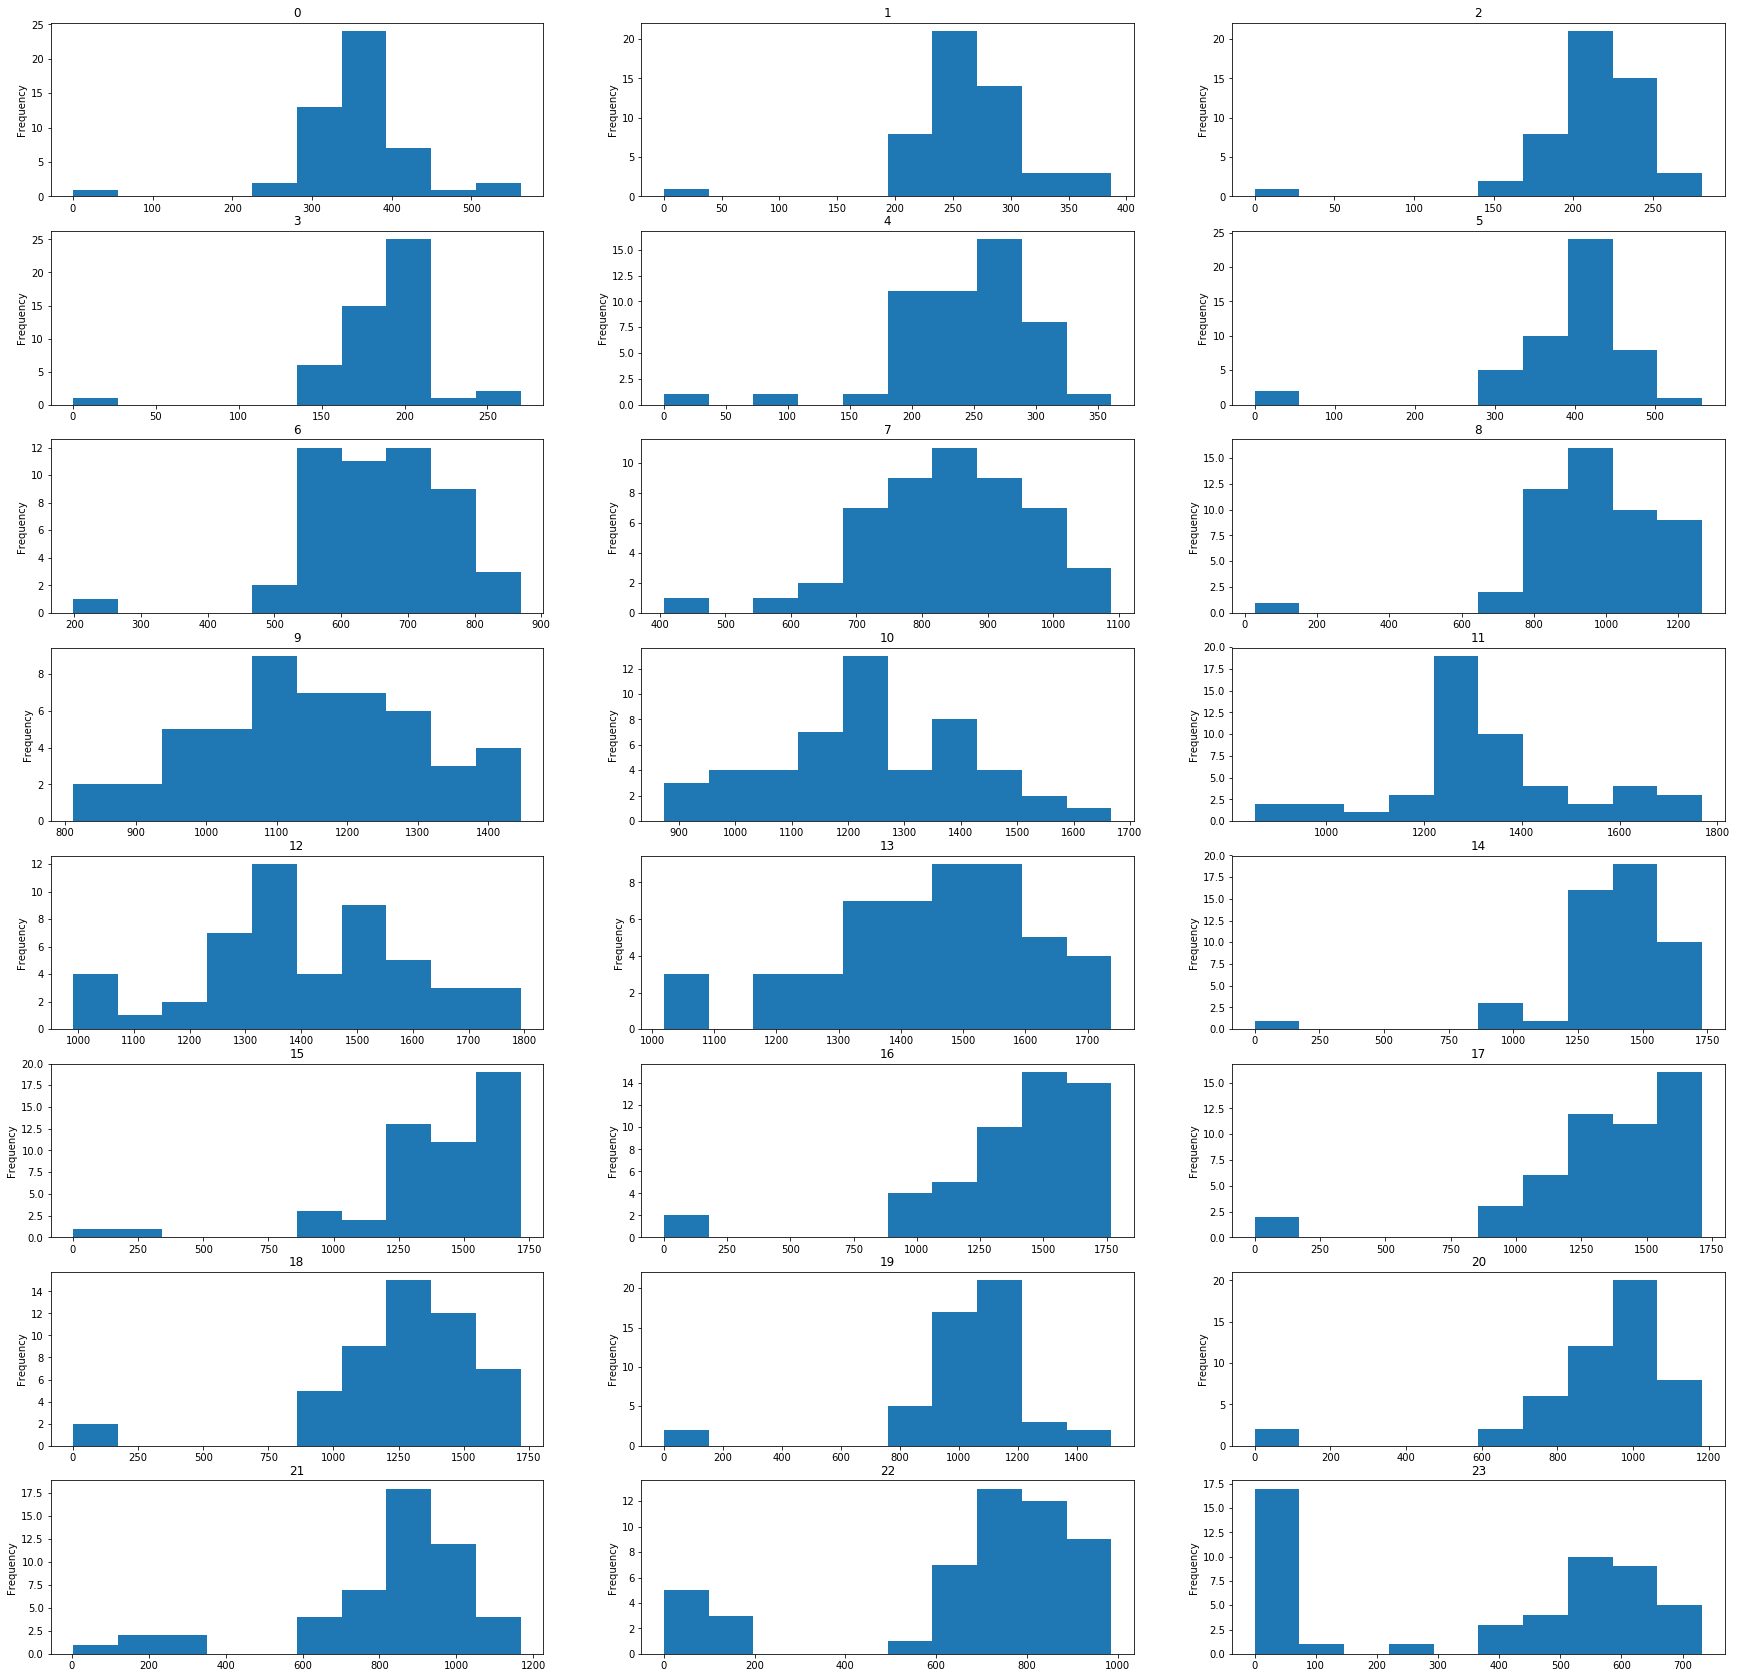

In [163]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sat['0'].plot.hist(ax=ax1,title='0')
df_139_sat['1'].plot.hist(ax=ax2,title='1')
df_139_sat['2'].plot.hist(ax=ax3,title='2')
df_139_sat['3'].plot.hist(ax=ax4,title='3')
df_139_sat['4'].plot.hist(ax=ax5,title='4')
df_139_sat['5'].plot.hist(ax=ax6,title='5')
df_139_sat['6'].plot.hist(ax=ax7,title='6')
df_139_sat['7'].plot.hist(ax=ax8,title='7')
df_139_sat['8'].plot.hist(ax=ax9,title='8')
df_139_sat['9'].plot.hist(ax=ax10,title='9')
df_139_sat['10'].plot.hist(ax=ax11,title='10')
df_139_sat['11'].plot.hist(ax=ax12,title='11')
df_139_sat['12'].plot.hist(ax=ax13,title='12')
df_139_sat['13'].plot.hist(ax=ax14,title='13')
df_139_sat['14'].plot.hist(ax=ax15,title='14')
df_139_sat['15'].plot.hist(ax=ax16,title='15')
df_139_sat['16'].plot.hist(ax=ax17,title='16')
df_139_sat['17'].plot.hist(ax=ax18,title='17')
df_139_sat['18'].plot.hist(ax=ax19,title='18')
df_139_sat['19'].plot.hist(ax=ax20,title='19')
df_139_sat['20'].plot.hist(ax=ax21,title='20')
df_139_sat['21'].plot.hist(ax=ax22,title='21')
df_139_sat['22'].plot.hist(ax=ax23,title='22')
df_139_sat['23'].plot.hist(ax=ax24,title='23')

### Sunday

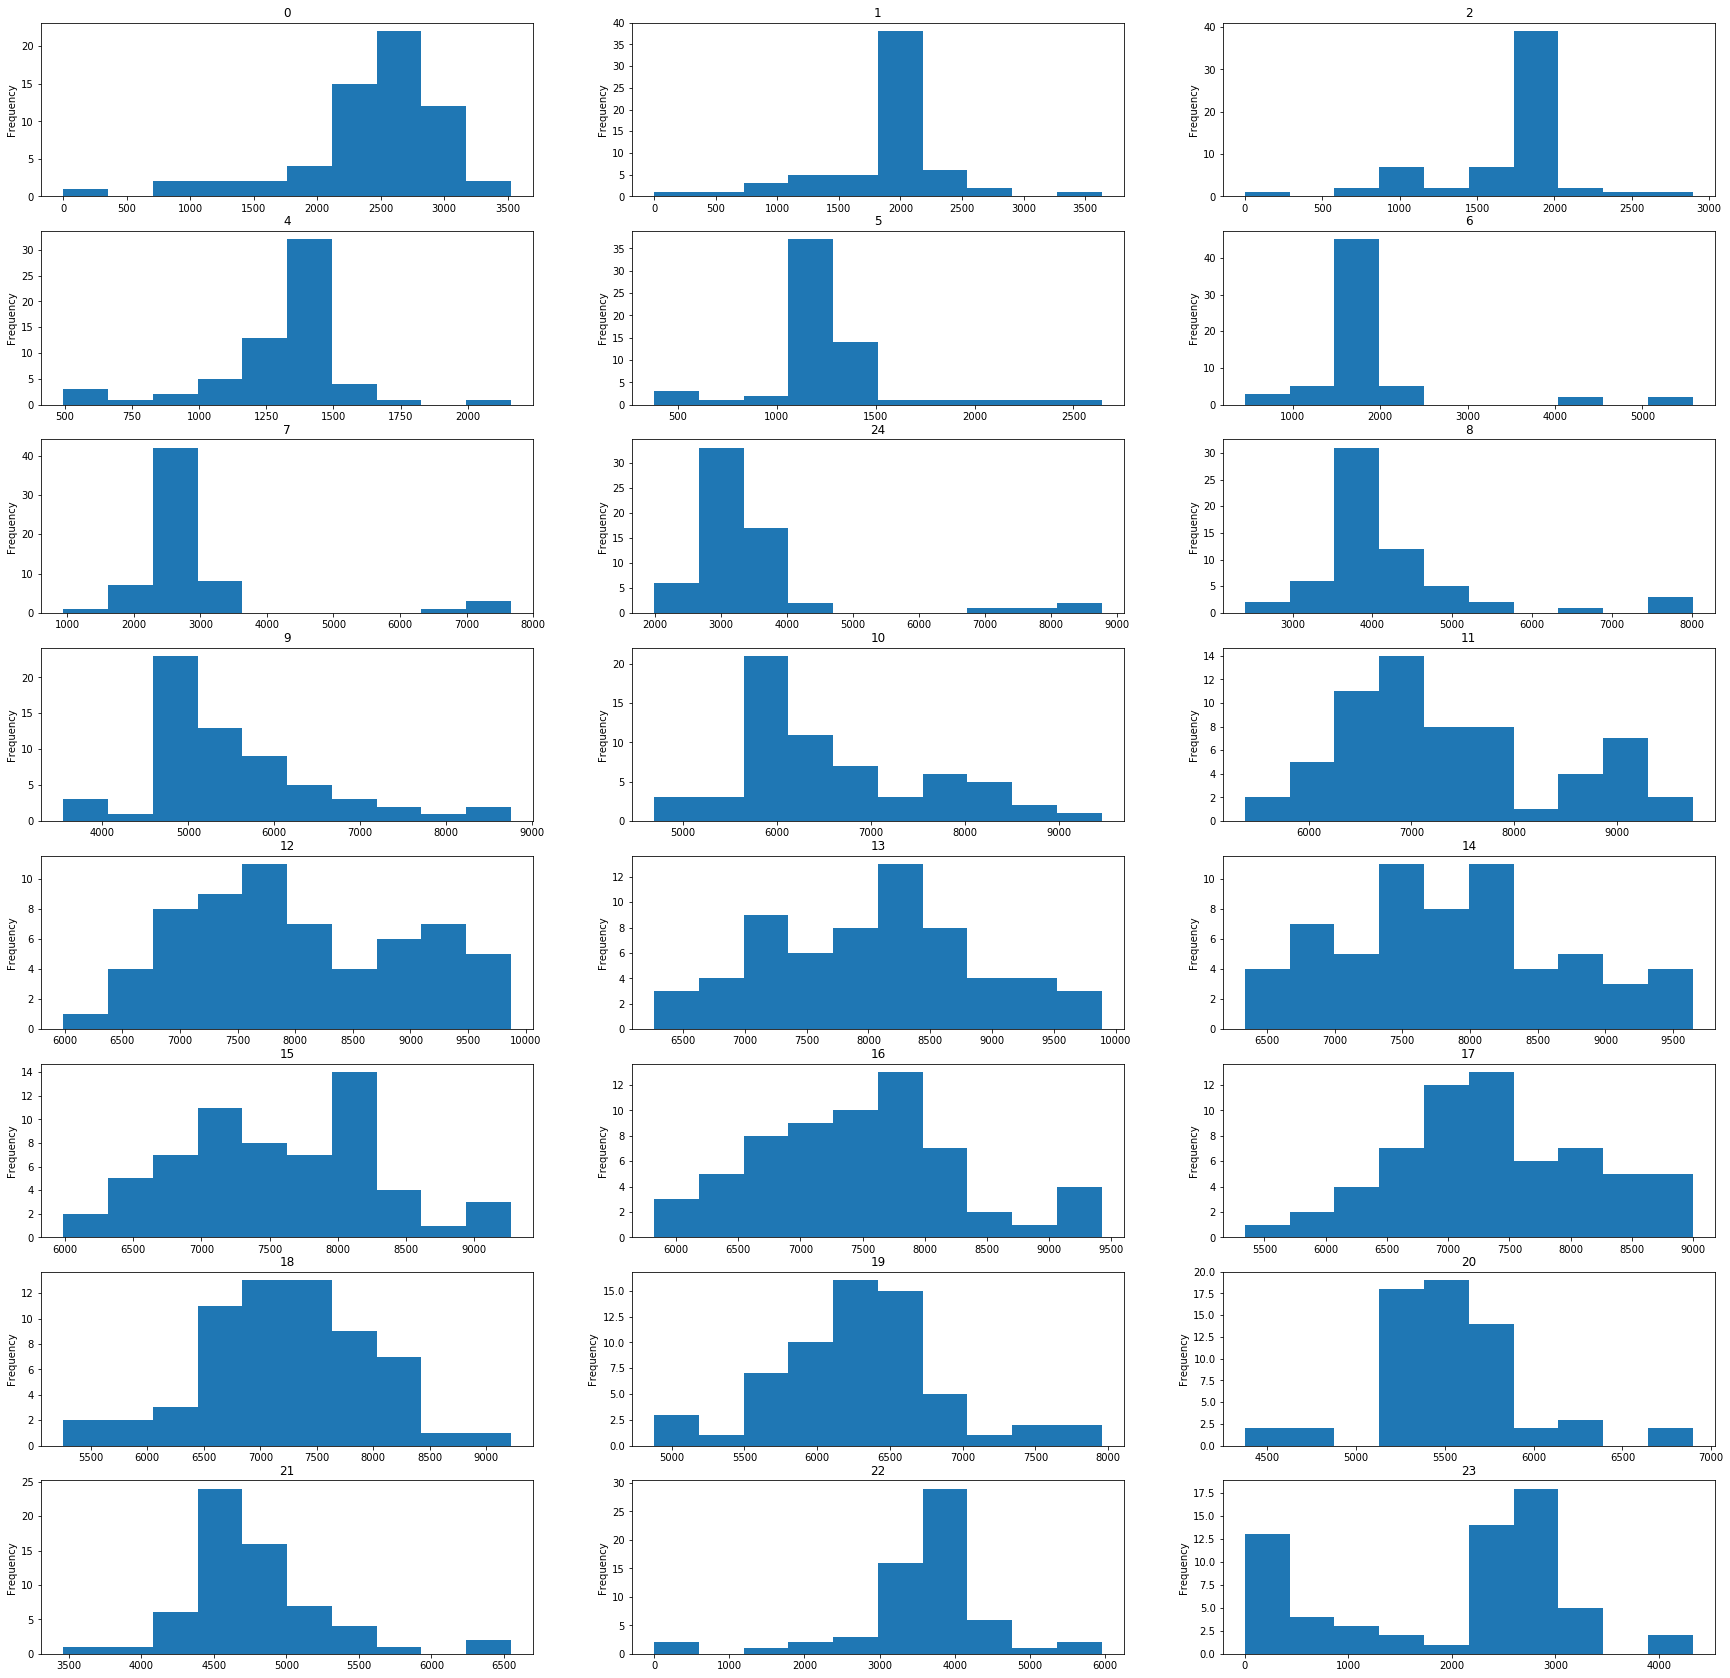

In [173]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sunh['0'].plot.hist(ax=ax1,title='0')
df_139_sunh['1'].plot.hist(ax=ax2,title='1')
df_139_sunh['2'].plot.hist(ax=ax3,title='2')
df_139_sunh['3'].plot.hist(ax=ax4,title='4')
df_139_sunh['4'].plot.hist(ax=ax5,title='5')
df_139_sunh['5'].plot.hist(ax=ax6,title='6')
df_139_sunh['6'].plot.hist(ax=ax7,title='7')
df_139_sunh['7'].plot.hist(ax=ax8,title='24')
df_139_sunh['8'].plot.hist(ax=ax9,title='8')
df_139_sunh['9'].plot.hist(ax=ax10,title='9')
df_139_sunh['10'].plot.hist(ax=ax11,title='10')
df_139_sunh['11'].plot.hist(ax=ax12,title='11')
df_139_sunh['12'].plot.hist(ax=ax13,title='12')
df_139_sunh['13'].plot.hist(ax=ax14,title='13')
df_139_sunh['14'].plot.hist(ax=ax15,title='14')
df_139_sunh['15'].plot.hist(ax=ax16,title='15')
df_139_sunh['16'].plot.hist(ax=ax17,title='16')
df_139_sunh['17'].plot.hist(ax=ax18,title='17')
df_139_sunh['18'].plot.hist(ax=ax19,title='18')
df_139_sunh['19'].plot.hist(ax=ax20,title='19')
df_139_sunh['20'].plot.hist(ax=ax21,title='20')
df_139_sunh['21'].plot.hist(ax=ax22,title='21')
df_139_sunh['22'].plot.hist(ax=ax23,title='22')
df_139_sunh['23'].plot.hist(ax=ax24,title='23')


### Sunday HOV

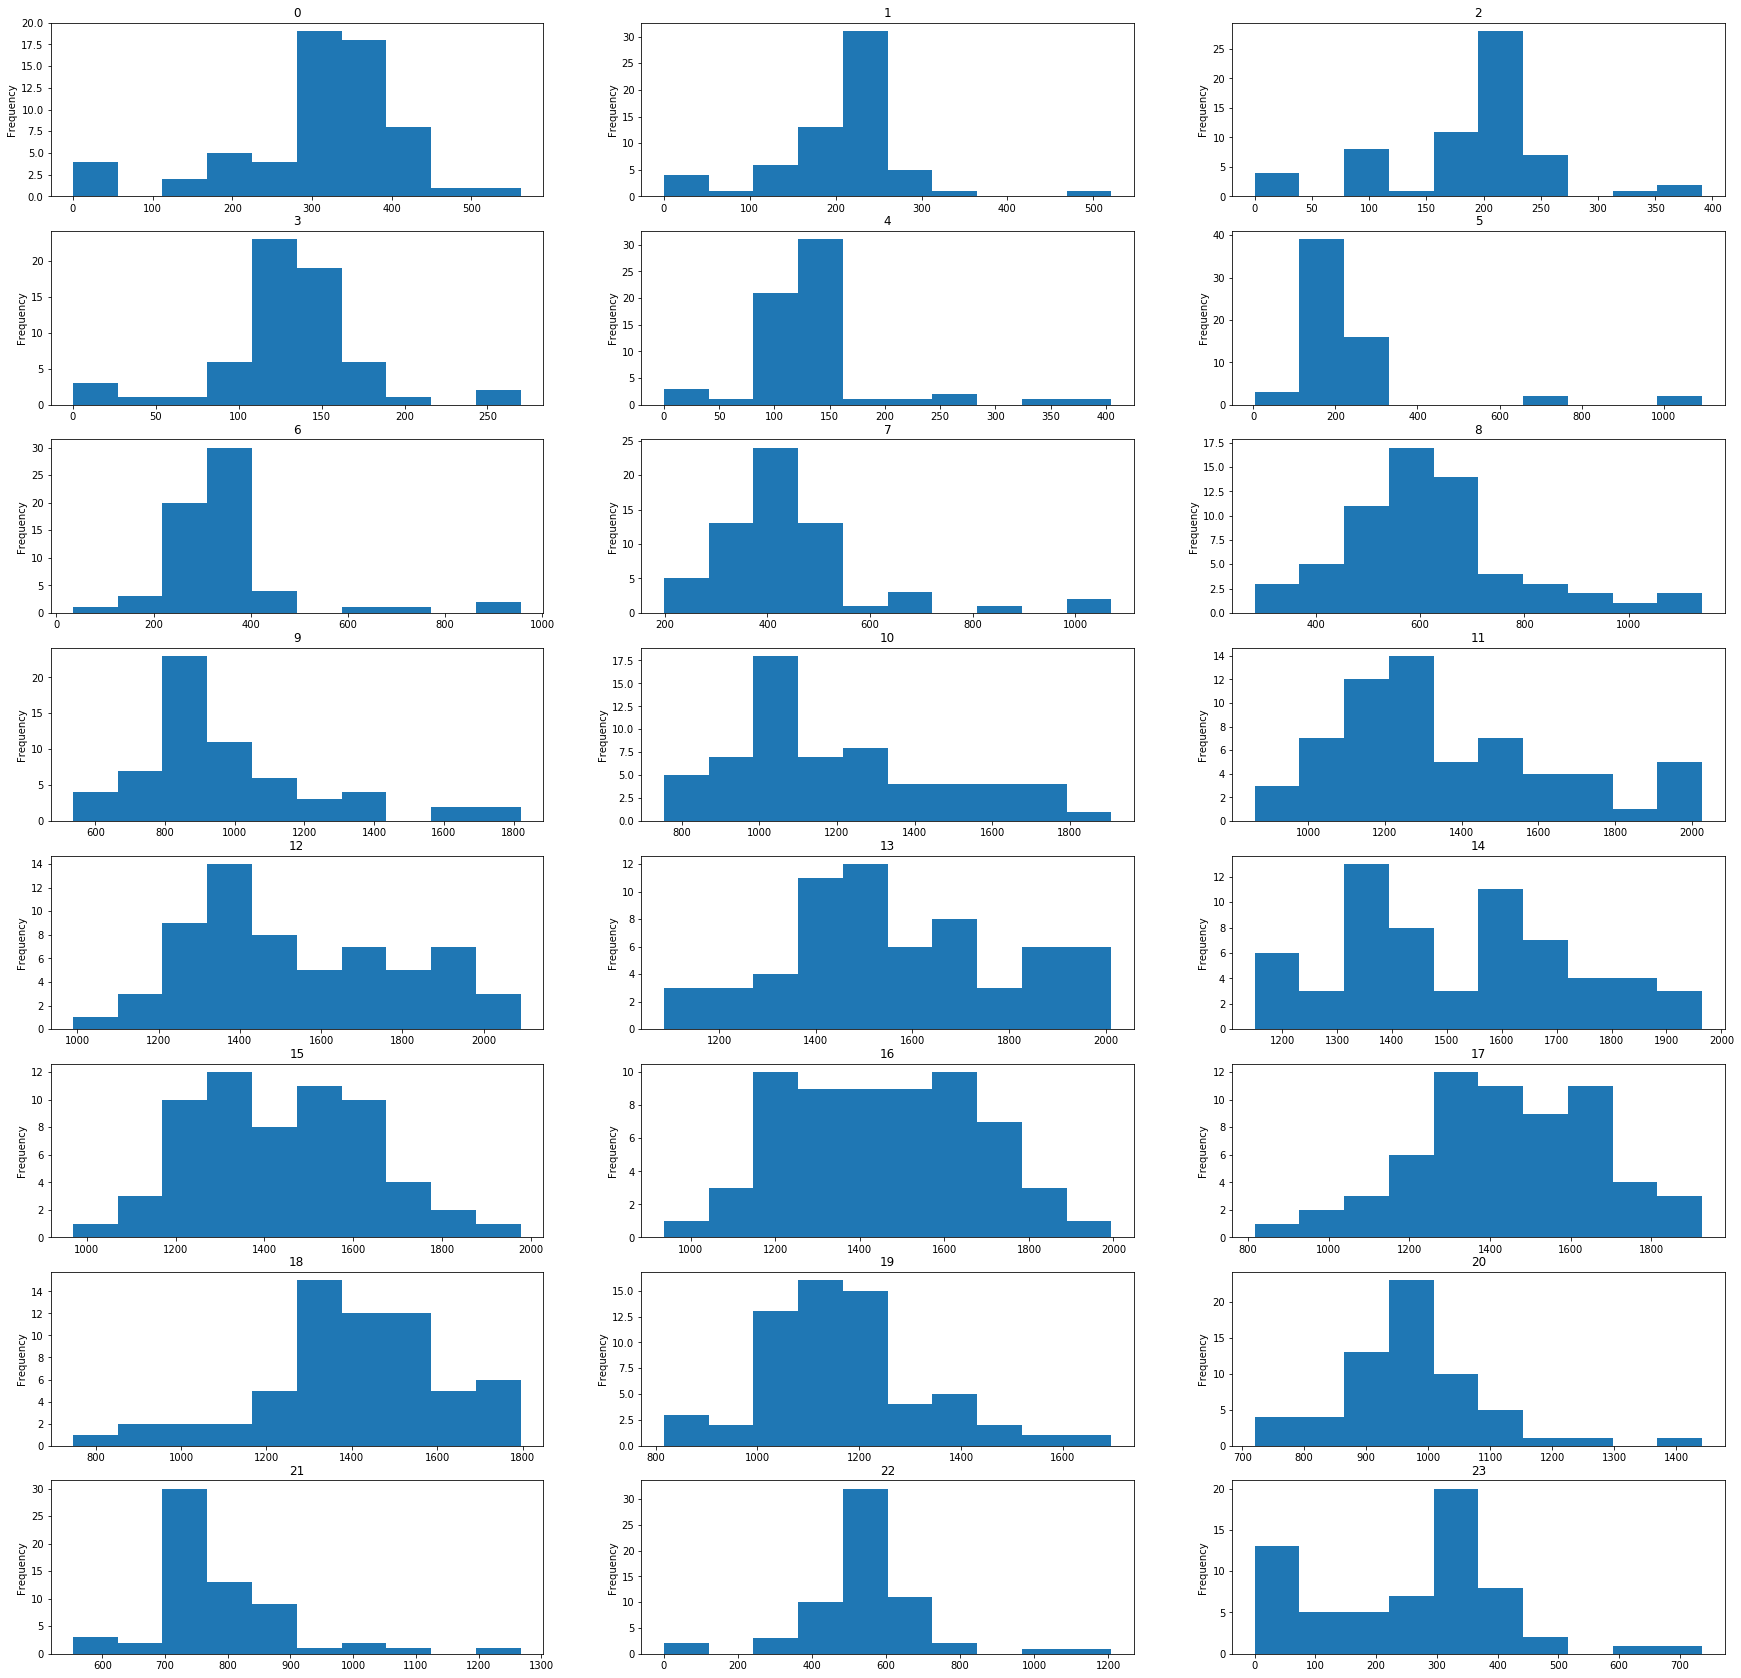

In [147]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sunh['0'].plot.hist(ax=ax1,title='0')
df_139_sunh['1'].plot.hist(ax=ax2,title='1')
df_139_sunh['2'].plot.hist(ax=ax3,title='2')
df_139_sunh['3'].plot.hist(ax=ax4,title='3')
df_139_sunh['4'].plot.hist(ax=ax5,title='4')
df_139_sunh['5'].plot.hist(ax=ax6,title='5')
df_139_sunh['6'].plot.hist(ax=ax7,title='6')
df_139_sunh['7'].plot.hist(ax=ax8,title='7')
df_139_sunh['8'].plot.hist(ax=ax9,title='8')
df_139_sunh['9'].plot.hist(ax=ax10,title='9')
df_139_sunh['10'].plot.hist(ax=ax11,title='10')
df_139_sunh['11'].plot.hist(ax=ax12,title='11')
df_139_sunh['12'].plot.hist(ax=ax13,title='12')
df_139_sunh['13'].plot.hist(ax=ax14,title='13')
df_139_sunh['14'].plot.hist(ax=ax15,title='14')
df_139_sunh['15'].plot.hist(ax=ax16,title='15')
df_139_sunh['16'].plot.hist(ax=ax17,title='16')
df_139_sunh['17'].plot.hist(ax=ax18,title='17')
df_139_sunh['18'].plot.hist(ax=ax19,title='18')
df_139_sunh['19'].plot.hist(ax=ax20,title='19')
df_139_sunh['20'].plot.hist(ax=ax21,title='20')
df_139_sunh['21'].plot.hist(ax=ax22,title='21')
df_139_sunh['22'].plot.hist(ax=ax23,title='22')
df_139_sunh['23'].plot.hist(ax=ax24,title='23')

### Sunday Lane1

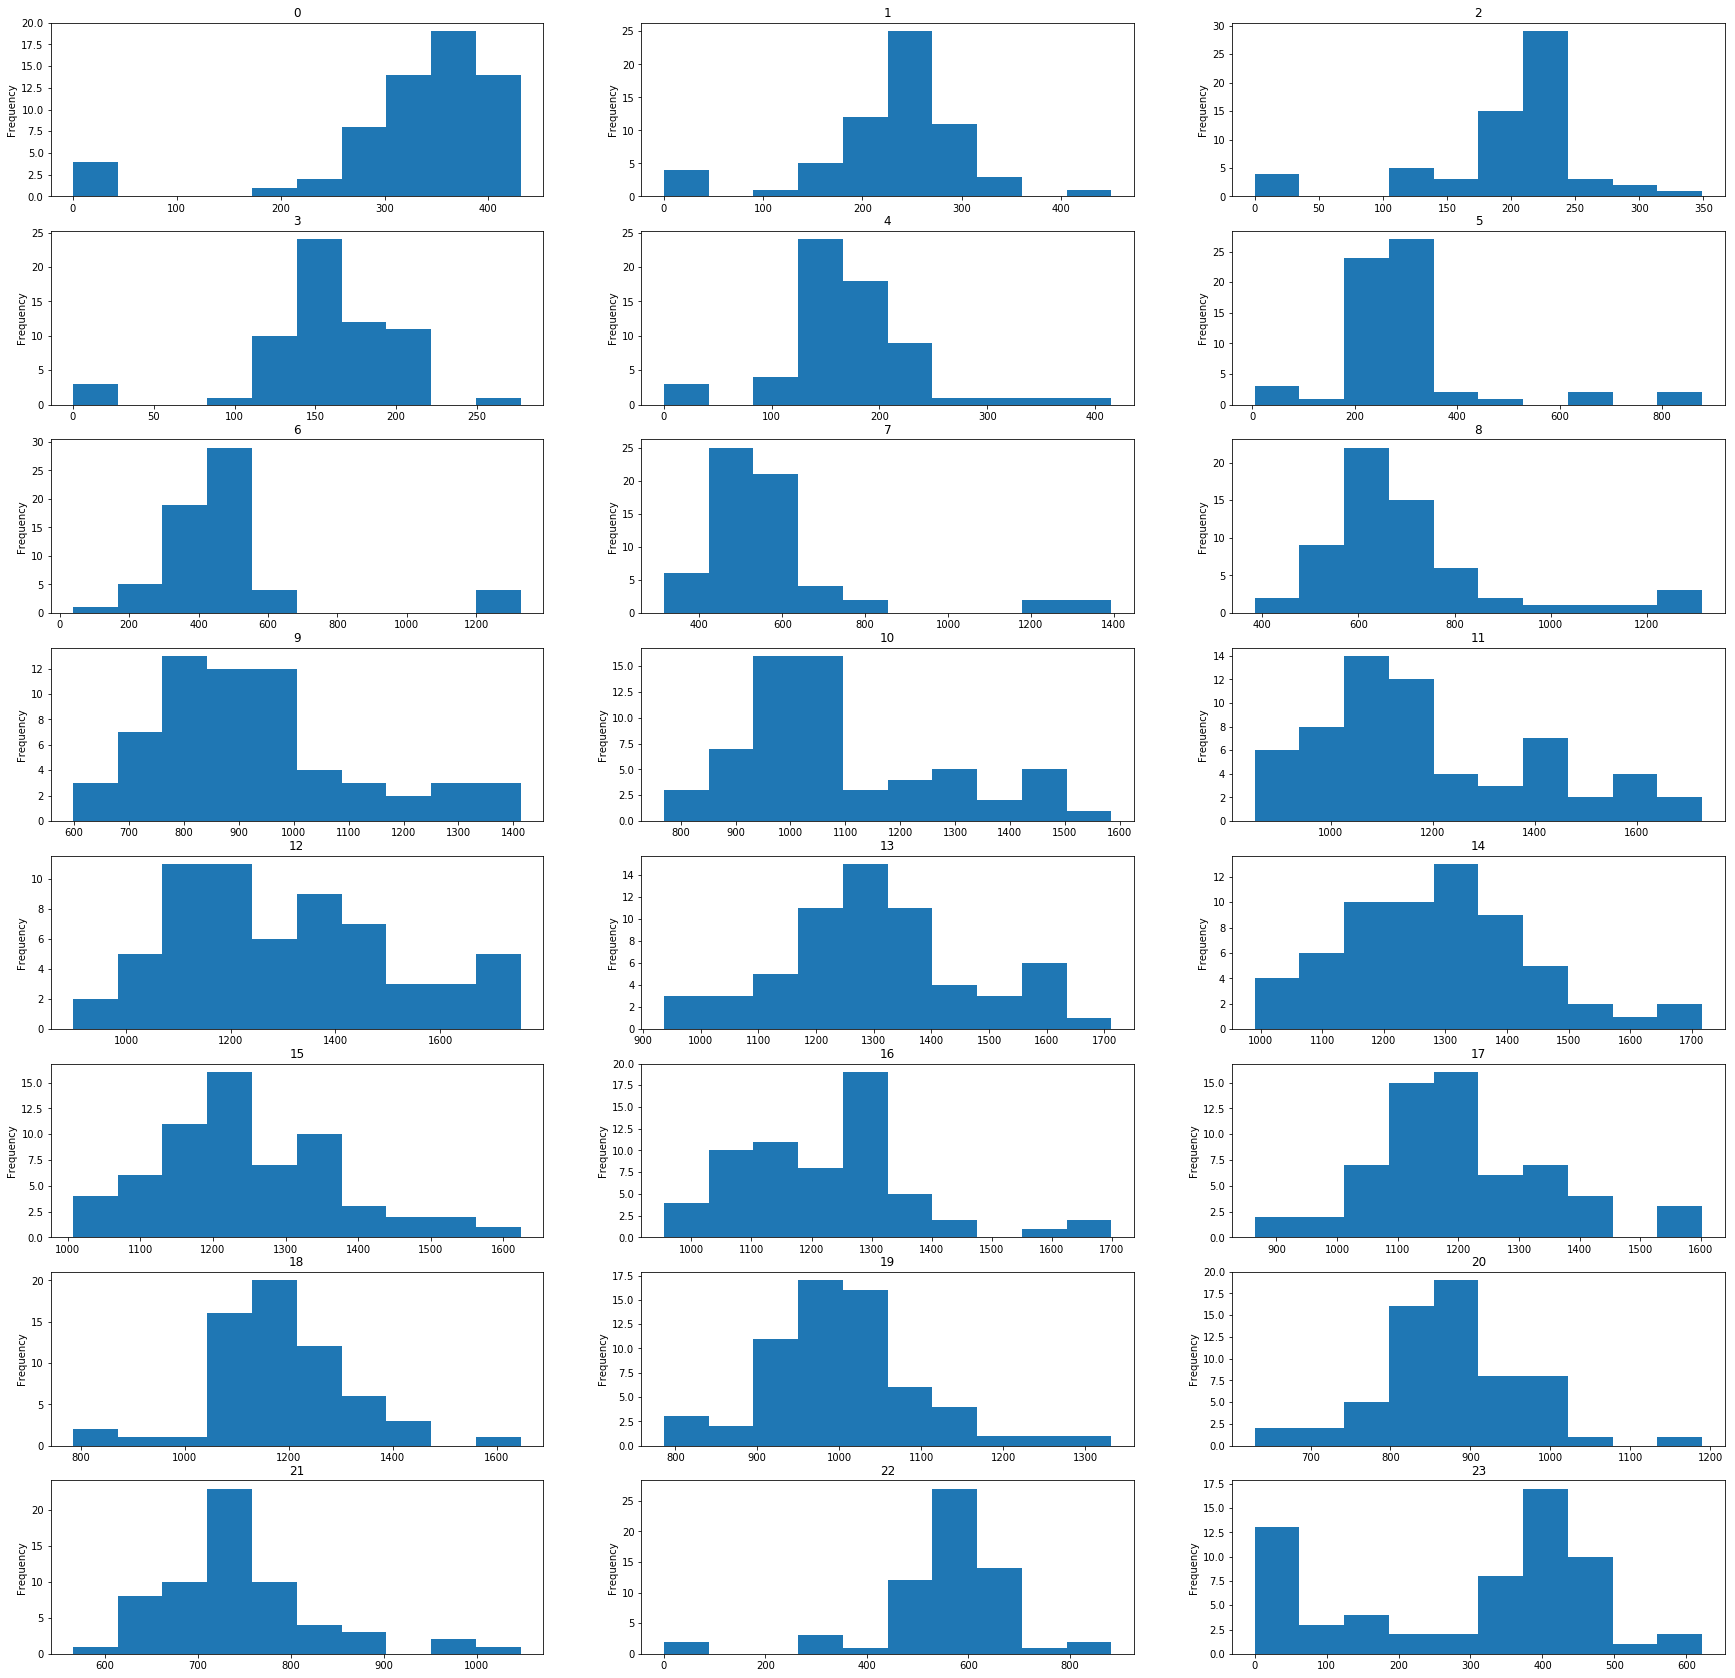

In [164]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139_sunh['0'].plot.hist(ax=ax1,title='0')
df_139_sunh['1'].plot.hist(ax=ax2,title='1')
df_139_sunh['2'].plot.hist(ax=ax3,title='2')
df_139_sunh['3'].plot.hist(ax=ax4,title='3')
df_139_sunh['4'].plot.hist(ax=ax5,title='4')
df_139_sunh['5'].plot.hist(ax=ax6,title='5')
df_139_sunh['6'].plot.hist(ax=ax7,title='6')
df_139_sunh['7'].plot.hist(ax=ax8,title='7')
df_139_sunh['8'].plot.hist(ax=ax9,title='8')
df_139_sunh['9'].plot.hist(ax=ax10,title='9')
df_139_sunh['10'].plot.hist(ax=ax11,title='10')
df_139_sunh['11'].plot.hist(ax=ax12,title='11')
df_139_sunh['12'].plot.hist(ax=ax13,title='12')
df_139_sunh['13'].plot.hist(ax=ax14,title='13')
df_139_sunh['14'].plot.hist(ax=ax15,title='14')
df_139_sunh['15'].plot.hist(ax=ax16,title='15')
df_139_sunh['16'].plot.hist(ax=ax17,title='16')
df_139_sunh['17'].plot.hist(ax=ax18,title='17')
df_139_sunh['18'].plot.hist(ax=ax19,title='18')
df_139_sunh['19'].plot.hist(ax=ax20,title='19')
df_139_sunh['20'].plot.hist(ax=ax21,title='20')
df_139_sunh['21'].plot.hist(ax=ax22,title='21')
df_139_sunh['22'].plot.hist(ax=ax23,title='22')
df_139_sunh['23'].plot.hist(ax=ax24,title='23')

### All data (Total)

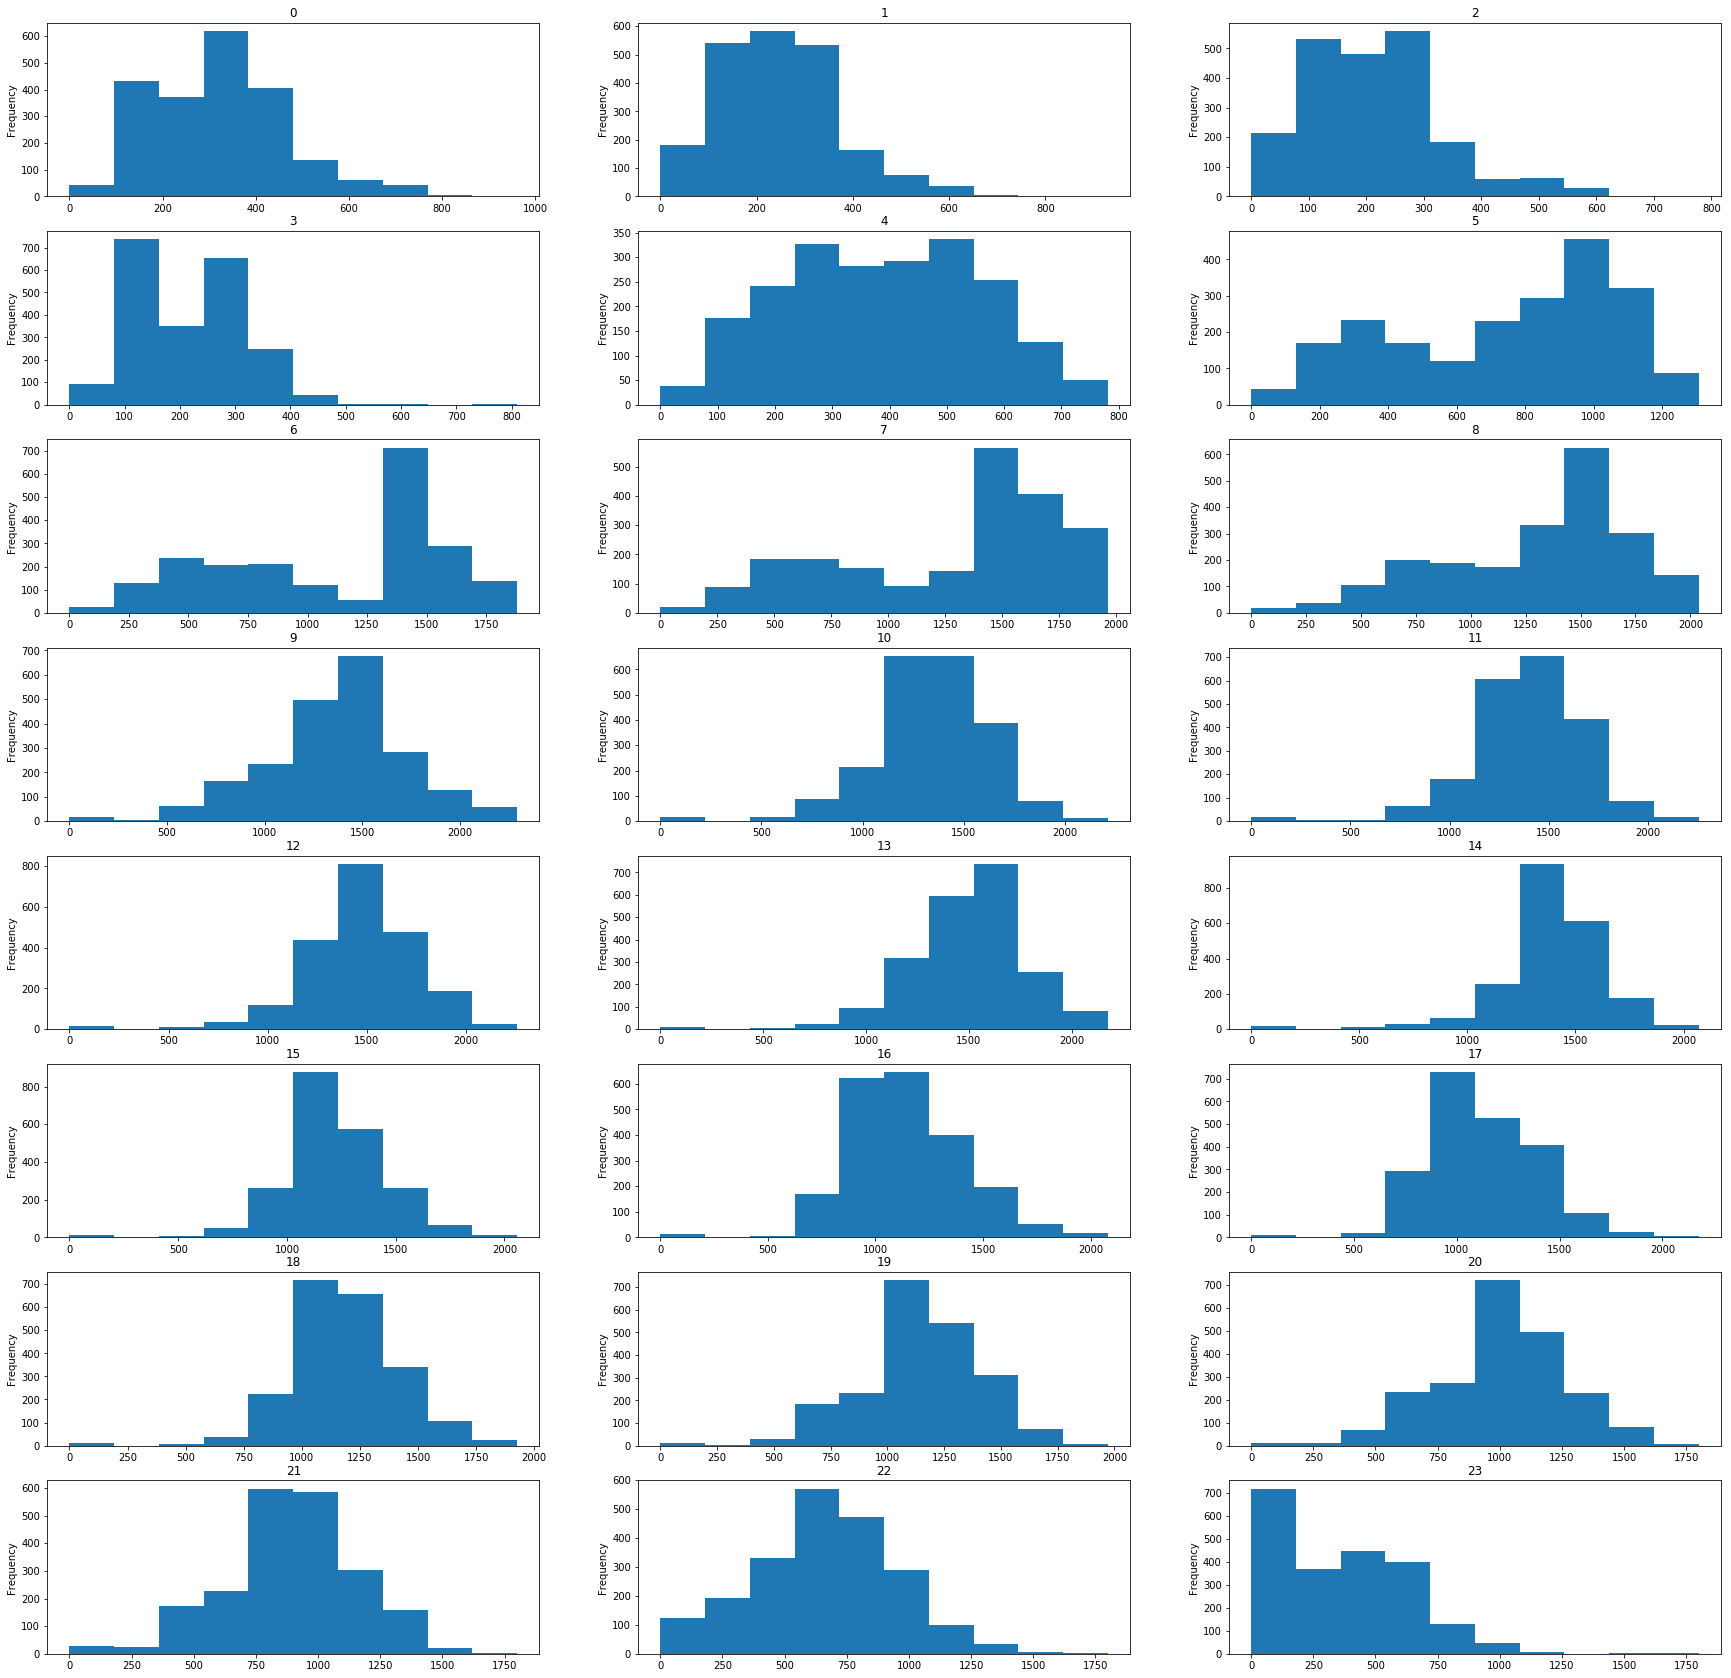

In [175]:
fig = plt.figure(figsize=(30,30))

ax1=fig.add_subplot(8,3,1)
ax2=fig.add_subplot(8,3,2)
ax3=fig.add_subplot(8,3,3)
ax4=fig.add_subplot(8,3,4)
ax5=fig.add_subplot(8,3,5)
ax6=fig.add_subplot(8,3,6)
ax7=fig.add_subplot(8,3,7)
ax8=fig.add_subplot(8,3,8)
ax9=fig.add_subplot(8,3,9)
ax10=fig.add_subplot(8,3,10)
ax11=fig.add_subplot(8,3,11)
ax12=fig.add_subplot(8,3,12)
ax13=fig.add_subplot(8,3,13)
ax14=fig.add_subplot(8,3,14)
ax15=fig.add_subplot(8,3,15)
ax16=fig.add_subplot(8,3,16)

ax17=fig.add_subplot(8,3,17)
ax18=fig.add_subplot(8,3,18)
ax19=fig.add_subplot(8,3,19)
ax20=fig.add_subplot(8,3,20)
ax21=fig.add_subplot(8,3,21)
ax22=fig.add_subplot(8,3,22)
ax23=fig.add_subplot(8,3,23)
ax24=fig.add_subplot(8,3,24)


df_139['0'].plot.hist(ax=ax1,title='0')
df_139['1'].plot.hist(ax=ax2,title='1')
df_139['2'].plot.hist(ax=ax3,title='2')
df_139['3'].plot.hist(ax=ax4,title='3')
df_139['4'].plot.hist(ax=ax5,title='4')
df_139['5'].plot.hist(ax=ax6,title='5')
df_139['6'].plot.hist(ax=ax7,title='6')
df_139['7'].plot.hist(ax=ax8,title='7')
df_139['8'].plot.hist(ax=ax9,title='8')
df_139['9'].plot.hist(ax=ax10,title='9')
df_139['10'].plot.hist(ax=ax11,title='10')
df_139['11'].plot.hist(ax=ax12,title='11')
df_139['12'].plot.hist(ax=ax13,title='12')
df_139['13'].plot.hist(ax=ax14,title='13')
df_139['14'].plot.hist(ax=ax15,title='14')
df_139['15'].plot.hist(ax=ax16,title='15')
df_139['16'].plot.hist(ax=ax17,title='16')
df_139['17'].plot.hist(ax=ax18,title='17')
df_139['18'].plot.hist(ax=ax19,title='18')
df_139['19'].plot.hist(ax=ax20,title='19')
df_139['20'].plot.hist(ax=ax21,title='20')
df_139['21'].plot.hist(ax=ax22,title='21')
df_139['22'].plot.hist(ax=ax23,title='22')
df_139['23'].plot.hist(ax=ax24,title='23')


In [495]:


#df_139_m['lane_descr']=np.where(df_139_m['lane_descr']=='HOV',df_139_m['lane_descr'],'Non-HOV')
#df_139_t['lane_descr']=np.where(df_139_t['lane_descr']=='HOV',df_139_t['lane_descr'],'Non-HOV')
#df_139_w['lane_descr']=np.where(df_139_w['lane_descr']=='HOV',df_139_w['lane_descr'],'Non-HOV')
#df_139_th['lane_descr']=np.where(df_139_th['lane_descr']=='HOV',df_139_th['lane_descr'],'Non-HOV')
#df_139_f['lane_descr']=np.where(df_139_f['lane_descr']=='HOV',df_139_f['lane_descr'],'Non-HOV')
#df_139_sat['lane_descr']=np.where(df_139_sat['lane_descr']=='HOV',df_139_sat['lane_descr'],'Non-HOV')
#df_139_sunh['lane_descr']=np.where(df_139_sunh['lane_descr']=='HOV',df_139_sunh['lane_descr'],'Non-HOV')




### COV (Coefficient of Variance)

In [ ]:
cv =  lambda x: np.var(x) / np.mean(x)

cv_by_lane_m=df_139_m.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_t=df_139_t.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_w=df_139_w.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_th=df_139_th.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_f=df_139_f.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_sat=df_139_sat.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

cv_by_lane_sunh=df_139_sunh.replace(0, np.nan)[['lane_descr','0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.groupby('lane_descr')\
.apply(cv)\

In [ ]:
[cv_by_lane_m.mean().mean(),cv_by_lane_t.mean().mean(),cv_by_lane_w.mean().mean(),cv_by_lane_th.mean().mean(),cv_by_lane_f.mean().mean(),cv_by_lane_sat.mean().mean(),cv_by_lane_sunh.mean().mean()]

In [35]:
#cv_by_lane.to_csv('test.csv')]

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

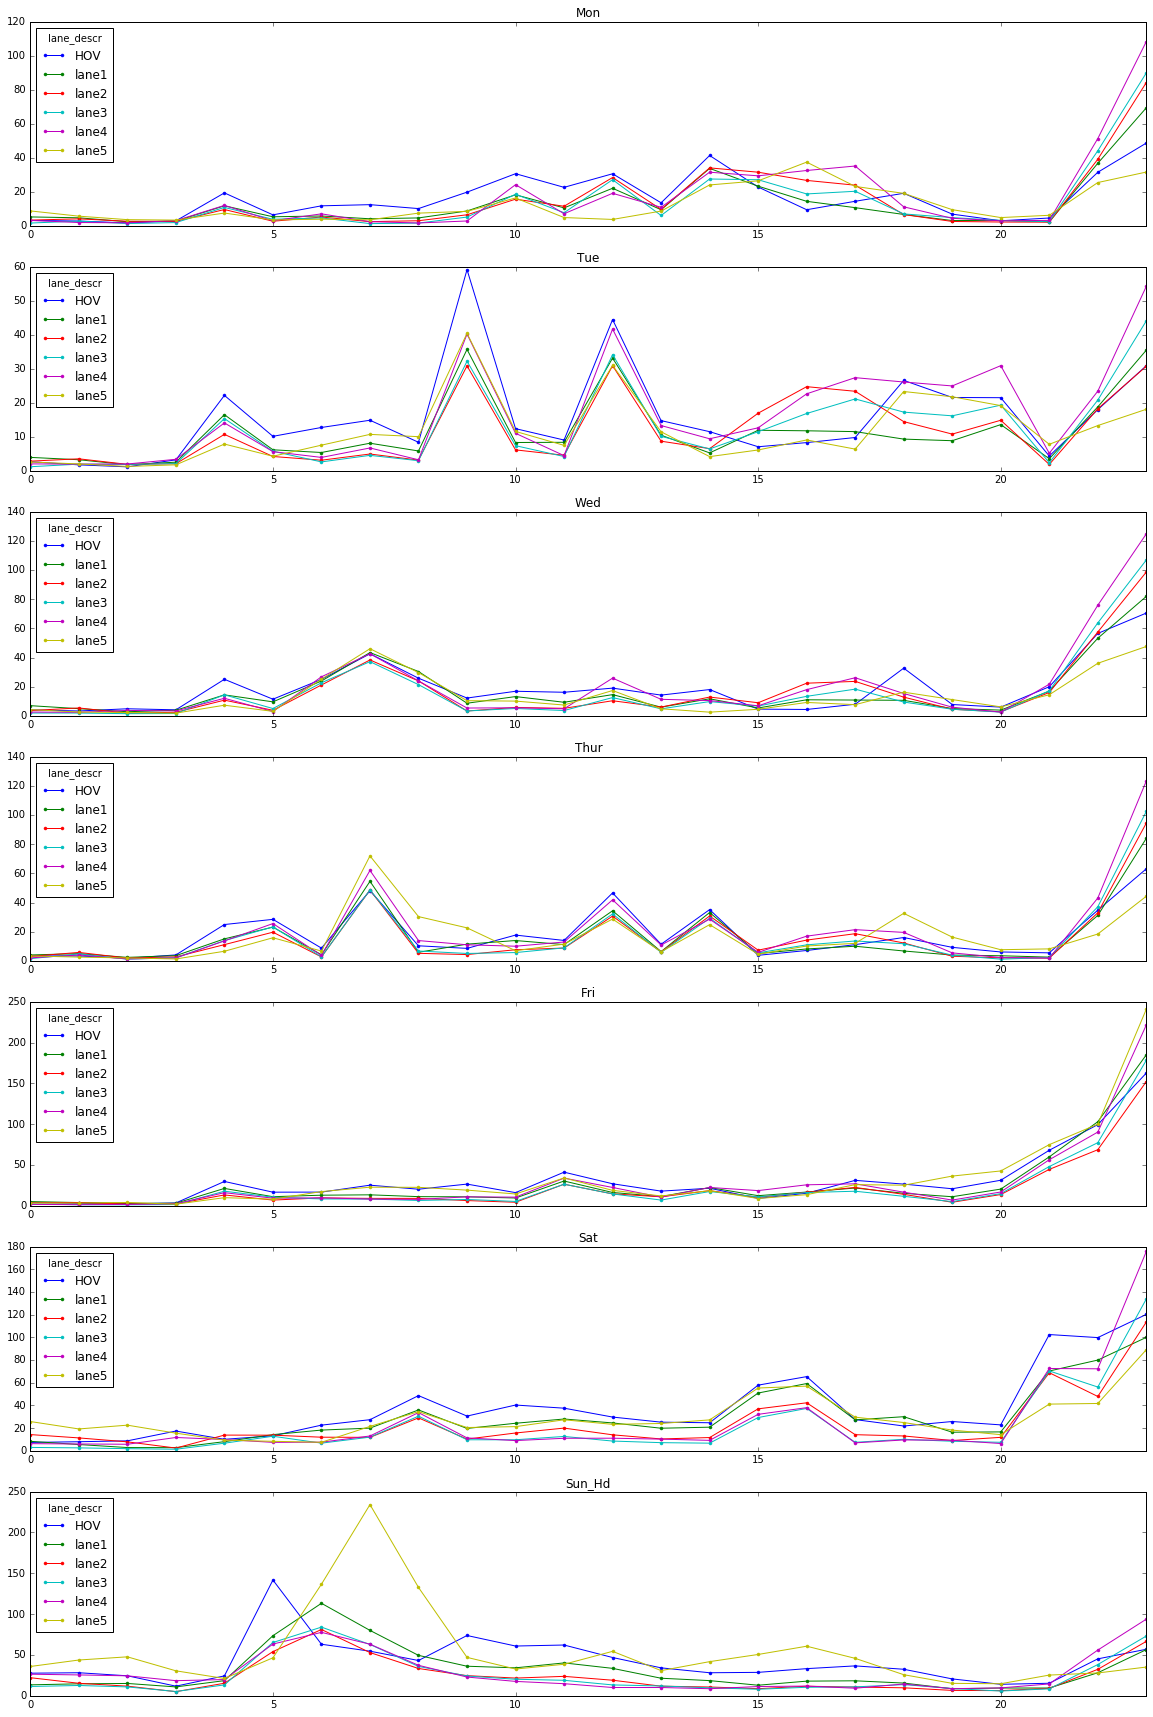

In [151]:
fig = plt.figure(figsize=(20,30))

ax1=fig.add_subplot(7,1,1)
ax2=fig.add_subplot(7,1,2)
ax3=fig.add_subplot(7,1,3)
ax4=fig.add_subplot(7,1,4)
ax5=fig.add_subplot(7,1,5)
ax6=fig.add_subplot(7,1,6)
ax7=fig.add_subplot(7,1,7)

cv_by_lane_m.T.plot(style='.-',ax=ax1,title='Mon')
cv_by_lane_t.T.plot(style='.-',ax=ax2,title='Tue')
cv_by_lane_w.T.plot(style='.-',ax=ax3,title='Wed')
cv_by_lane_th.T.plot(style='.-',ax=ax4,title='Thur')
cv_by_lane_f.T.plot(style='.-',ax=ax5,title='Fri')
cv_by_lane_sat.T.plot(style='.-',ax=ax6,title='Sat')
cv_by_lane_sunh.T.plot(style='.-',ax=ax7,title='Sun_Hd')


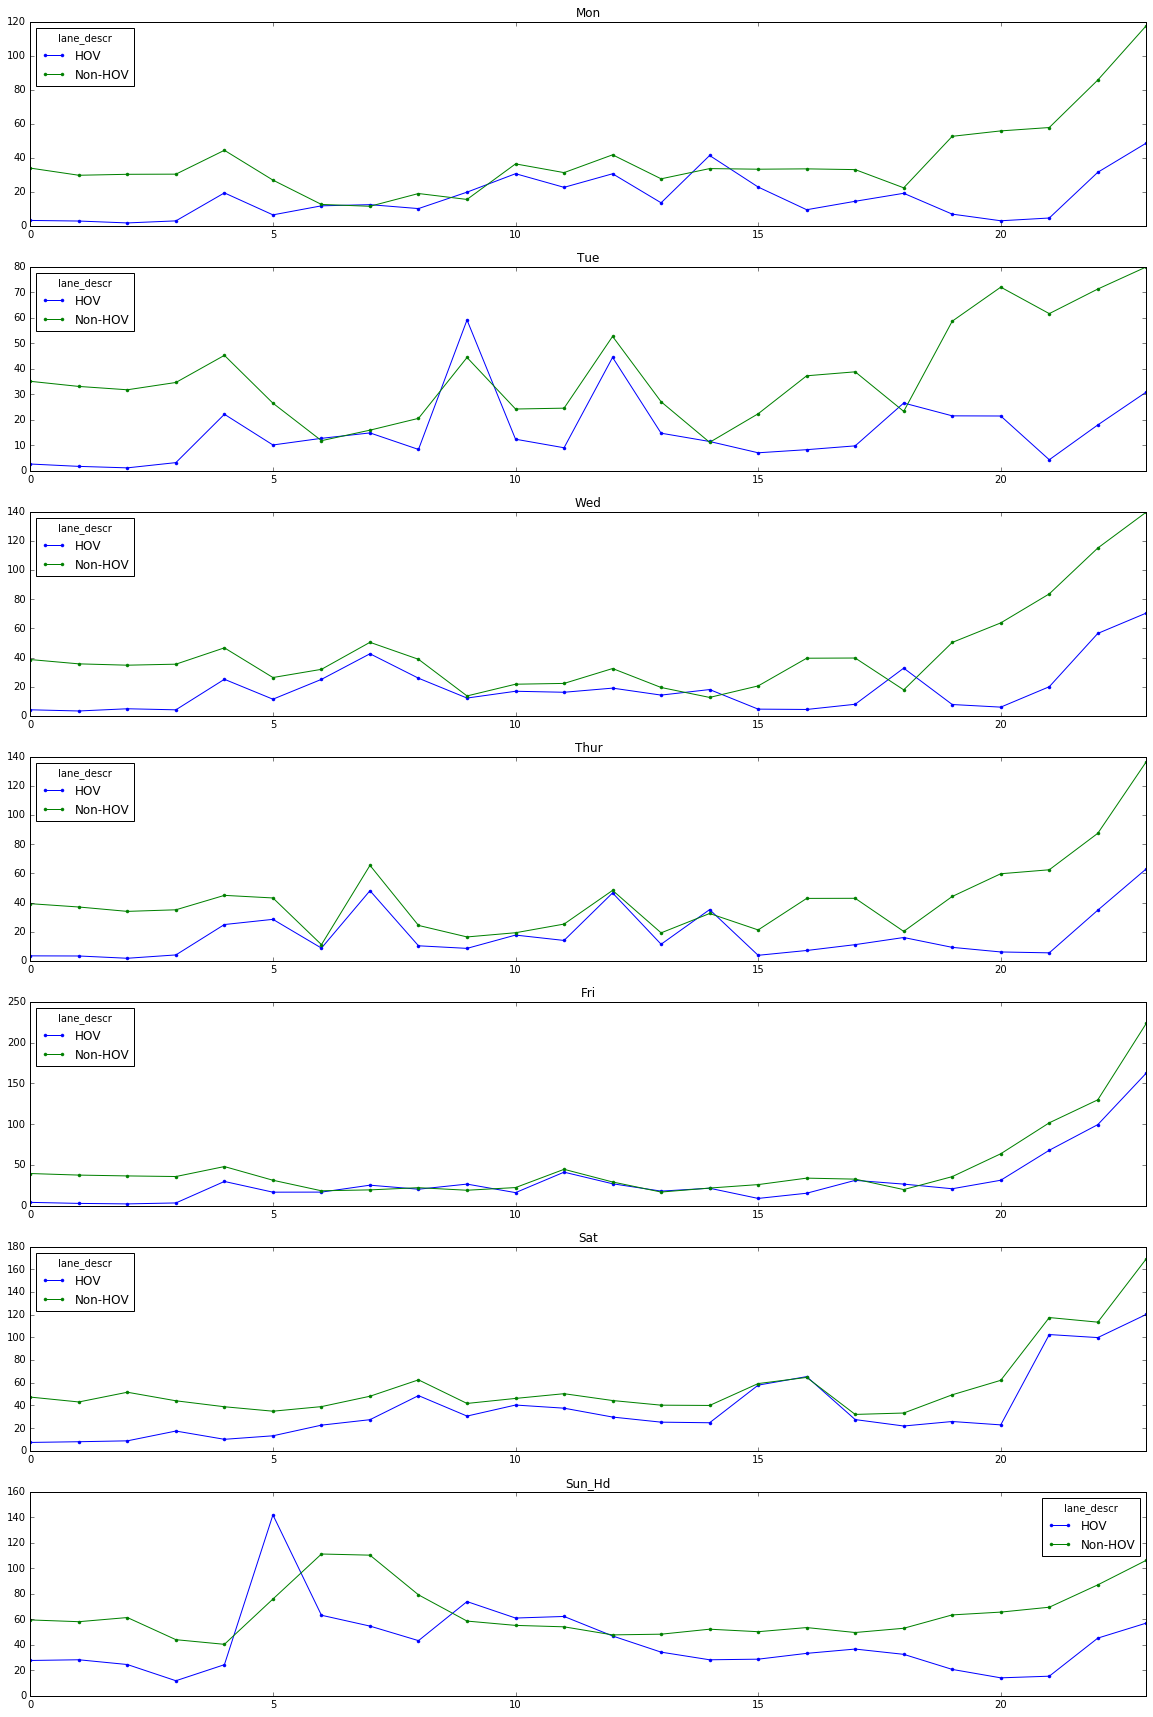

In [172]:
fig = plt.figure(figsize=(20,30))

ax1=fig.add_subplot(7,1,1)
ax2=fig.add_subplot(7,1,2)
ax3=fig.add_subplot(7,1,3)
ax4=fig.add_subplot(7,1,4)
ax5=fig.add_subplot(7,1,5)
ax6=fig.add_subplot(7,1,6)
ax7=fig.add_subplot(7,1,7)

cv_by_lane_m.T.plot(style='.-',ax=ax1,title='Mon')
cv_by_lane_t.T.plot(style='.-',ax=ax2,title='Tue')
cv_by_lane_w.T.plot(style='.-',ax=ax3,title='Wed')
cv_by_lane_th.T.plot(style='.-',ax=ax4,title='Thur')
cv_by_lane_f.T.plot(style='.-',ax=ax5,title='Fri')
cv_by_lane_sat.T.plot(style='.-',ax=ax6,title='Sat')
cv_by_lane_sunh.T.plot(style='.-',ax=ax7,title='Sun_Hd')

In [105]:
df_139_m

,date,sum_type,location,route,direction,milepost,det#,20,6,18,...,0,17,2,7,12,4,9,21,5,week
8,2017-01-09,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5213,8504,6025,...,1961,5962,1051,9633,9083,2213,9237,4792,5213,Monday
22,2017-01-23,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,4789,8332,5977,...,1564,4871,957,9638,8981,2061,9071,4361,5078,Monday
28,2017-01-30,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5730,8456,5992,...,1579,5349,917,9715,9131,2123,9291,4700,5128,Monday
35,2017-02-06,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5508,8393,6057,...,1529,5697,923,9429,9313,2238,9369,4819,5160,Monday
42,2017-02-13,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5591,6953,6466,...,1527,5835,875,9182,8553,2116,9746,4863,5229,Monday
56,2017-02-27,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5212,8686,5877,...,1733,5181,1012,9612,9557,2211,9620,4655,5406,Monday
63,2017-03-06,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5660,8716,5786,...,1781,5491,974,9535,9090,2166,9118,4735,5436,Monday
70,2017-03-13,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5948,8573,6014,...,1799,5520,1135,9439,9323,2355,9777,5201,5599,Monday
77,2017-03-20,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,6003,8708,6465,...,1562,5945,1029,9523,8633,2439,9610,5357,5781,Monday
84,2017-03-27,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,5705,8401,6366,...,1717,5012,939,9717,9389,2612,9773,5253,5785,Monday


In [146]:
cv =  lambda x: np.var(x) / np.mean(x)

cv_by_lane_m1=df_139_m.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_t1=df_139_t.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_w1=df_139_w.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_th1=df_139_th.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_f1=df_139_f
[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_sat1=df_139_sat.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_sunh1=df_139_sunh.replace(0, np.nan)[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

pd_total_cv=pd.concat([cv_by_lane_m1, cv_by_lane_t1,cv_by_lane_w1,cv_by_lane_th1,cv_by_lane_f1,cv_by_lane_sat1,cv_by_lane_sunh1], axis=1)
names=["Mon","Tue","Wed","Thur","Fri","Sat","Sun_Hd"]
pd_total_cv.columns=names

In [144]:
cv =  lambda x: np.var(x) / np.mean(x)

cv_by_lane_m1=df_139_m[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_t1=df_139_t[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_w1=df_139_w[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_th1=df_139_th[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_f1=df_139_f[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_sat1=df_139_sat[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

cv_by_lane_sunh1=df_139_sunh[['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']]\
.apply(cv)\

pd_total_cv=pd.concat([cv_by_lane_m1, cv_by_lane_t1,cv_by_lane_w1,cv_by_lane_th1,cv_by_lane_f1,cv_by_lane_sat1,cv_by_lane_sunh1], axis=1)
names=["Mon","Tue","Wed","Thur","Fri","Sat","Sun_Hd"]
pd_total_cv.columns=names

In [142]:
pd_total_cv

,Mon,Tue,Wed,Thur,Fri,Sat,Sun_Hd
0,11.648353,8.044664,10.020063,8.687122,11.204217,37.645538,107.500945
1,11.231024,7.299915,9.263093,16.993401,7.164098,27.394964,101.734264
2,5.722452,4.793680,7.258758,3.461310,5.292109,18.163490,83.248912
3,8.472196,8.359329,8.260841,8.944976,9.050270,23.772486,52.910353
4,63.957597,80.114113,76.815372,78.082218,99.794216,45.372075,95.086517
5,18.062177,30.360567,22.171697,130.357306,56.312355,41.796569,386.730279
6,22.676438,18.667361,126.330594,14.119922,60.953552,55.688629,508.641897
7,12.760939,34.726172,238.730892,310.856642,70.683568,86.076336,445.866587
8,16.043273,24.376225,145.007480,41.121620,57.877929,188.593343,256.634862
9,25.600268,223.669472,26.046073,32.959301,57.905392,74.765737,192.844918


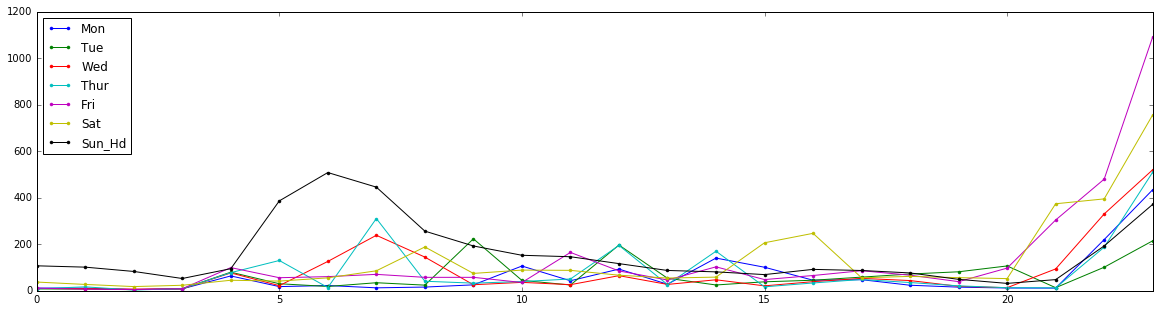

In [147]:
pd_total_cv.plot(style='.-',figsize=(20,5))

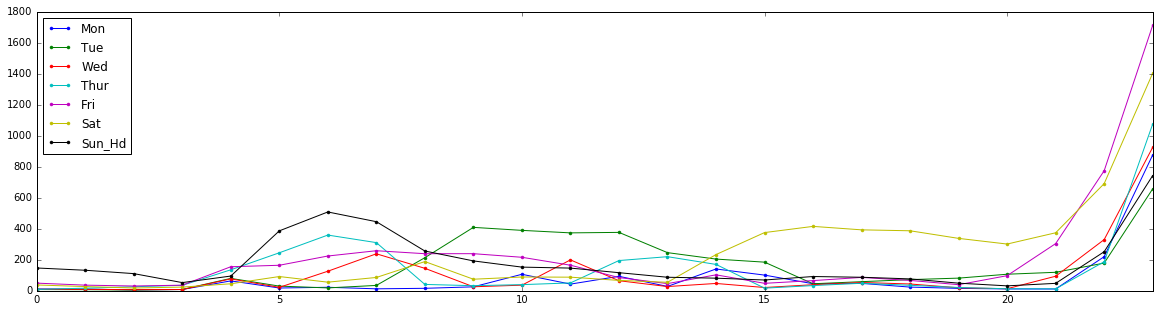

In [145]:
pd_total_cv.plot(style='.-',figsize=(20,5))

In [907]:
writer1 = pd.ExcelWriter('139_outlier_t.xlsx', engine='xlsxwriter')

df_139_m.to_excel(writer1, sheet_name='Mon',index=False)
df_139_t.to_excel(writer1, sheet_name='Tue',index=False)
df_139_t.to_excel(writer1, sheet_name='Tue',index=False)
df_139_w.to_excel(writer1, sheet_name='Wed',index=False)
df_139_th.to_excel(writer1, sheet_name='Thu',index=False)
df_139_f.to_excel(writer1, sheet_name='Fri',index=False)
df_139_sat.to_excel(writer1, sheet_name='Sat',index=False)
df_139_sunh.to_excel(writer1, sheet_name='Sun_H',index=False)
writer1.save()

#################################################################

# Detect outliers

In [267]:
df_139_m.dtypes

date           object
sum_type       object
lane_descr     object
0               int64
1               int64
2               int64
3               int64
4               int64
5               int64
6               int64
7               int64
8               int64
9               int64
10              int64
11              int64
12              int64
13              int64
14              int64
15              int64
16              int64
17              int64
18              int64
19              int64
20              int64
21              int64
22              int64
23              int64
location       object
route          object
direction      object
milepost      float64
det#            int64
week           object
dtype: object

In [454]:
 #lane_ave_t=df_139_m.replace(0, np.nan).groupby('lane_descr')['1'].mean().reset_index()

In [604]:
 #lane_pct_t=df_139_m.replace(0, np.nan).groupby('lane_descr')['1'].quantile(0.1).reset_index()

# #### Use rule: less than 0.1 of the average & larget than 2500

In [890]:
for time in ['0','1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']:
    lane_ave_m=df_139_m.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_m.columns=['lane_descr','ave']
    df_139_m=df_139_m.merge(lane_ave_m)
    df_139_m[time]= np.where( (df_139_m[time]<= df_139_m['ave']*0.1 )|(df_139_m[time]>2500),float('NaN'), df_139_m[time])
    df_139_m=df_139_m.drop('ave', axis=1)              
    
    lane_ave_t=df_139_t.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_t.columns=['lane_descr','ave']
    df_139_t=df_139_t.merge(lane_ave_t)
    df_139_t[time]= np.where( (df_139_t[time]<= df_139_t['ave']*0.1)|(df_139_t[time]>2500),float('NaN'),df_139_t[time])
    df_139_t=df_139_t.drop('ave', axis=1)                
               
    lane_ave_w=df_139_w.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_w.columns=['lane_descr','ave']
    df_139_w=df_139_w.merge(lane_ave_w)
    df_139_w[time]= np.where((df_139_w[time]<= df_139_w['ave']*0.1)|(df_139_w[time]>2500),float('NaN'),df_139_w[time])
    df_139_w=df_139_w.drop('ave', axis=1)                                            
                        
    lane_ave_th=df_139_th.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_th.columns=['lane_descr','ave']
    df_139_th=df_139_th.merge(lane_ave_th)                
    df_139_th[time]= np.where((df_139_th[time]<= df_139_th['ave']*0.1)|(df_139_th[time]>2500),float('NaN'),df_139_th[time])
    df_139_th=df_139_th.drop('ave', axis=1)                                             

    lane_ave_f=df_139_f.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_f.columns=['lane_descr','ave']
    df_139_f=df_139_f.merge(lane_ave_f)
    df_139_f[time]= np.where((df_139_f[time]<= df_139_f['ave']*0.1)|(df_139_f[time]>2500),float('NaN'),df_139_f[time])
    df_139_f=df_139_f.drop('ave', axis=1)                          

    lane_ave_sat=df_139_sat.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_sat.columns=['lane_descr','ave']
    df_139_sat=df_139_sat.merge(lane_ave_sat)                      
    df_139_sat[time]= np.where((df_139_sat[time]<df_139_sat['ave']*0.1)|(df_139_sat[time]>2500),float('NaN'),df_139_sat[time])
    df_139_sat=df_139_sat.drop('ave', axis=1)     
                           
    lane_ave_sunh=df_139_sunh.replace(0, np.nan).groupby('lane_descr')[time].mean().reset_index()
    lane_ave_sunh.columns=['lane_descr','ave']
    df_139_sunh=df_139_sunh.merge(lane_ave_sunh)
    df_139_sunh[time]= np.where((df_139_sunh[time]<= df_139_sunh['ave']*0.1)|(df_139_sunh[time]>2500),float('NaN'),df_139_sunh[time])
    df_139_sunh=df_139_sunh.drop('ave', axis=1)                            

In [891]:
L1=[df_139_m.isnull().sum().sum(), df_139_t.isnull().sum().sum(), df_139_w.isnull().sum().sum(),df_139_th.isnull().sum().sum(),df_139_f.isnull().sum().sum(),df_139_sat.isnull().sum().sum(),df_139_sunh.isnull().sum().sum()]

In [892]:
L1

[17, 23, 15, 27, 37, 41, 36]

In [893]:
L0=[df_139_m.iloc[:,3:27].count().sum(),df_139_t.iloc[:,3:27].count().sum(),df_139_w.iloc[:,3:27].count().sum(),df_139_th.iloc[:,3:27].count().sum(),df_139_f.iloc[:,3:27].count().sum(),df_139_sat.iloc[:,3:27].count().sum(),df_139_sunh.iloc[:,3:27].count().sum()]

In [894]:
L0

[1015, 1153, 1209, 1149, 1163, 1159, 1452]

In [827]:
styled_df_139_m = (df_139_m.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))


styled_df_139_t = (df_139_t.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))


styled_df_139_w = (df_139_w.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))


styled_df_139_th = (df_139_th.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))


styled_df_139_f = (df_139_f.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))


styled_df_139_sat = (df_139_sat.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))

styled_df_139_sunh = (df_139_sunh.style
            .applymap(lambda v: 'background-color: %s' % 'red' if v=='' else ''))

Read clean dataset

In [604]:
'''df_139_m= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Mon', ignore_index=True)
df_139_t= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Tue', ignore_index=True)
df_139_w= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Wed', ignore_index=True)
df_139_th= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Thu', ignore_index=True)
df_139_f= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Fri', ignore_index=True)
df_139_sat= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Sat', ignore_index=True)
df_139_sunh= pd.read_excel('139_outlier_1clean.xlsx', sheetname='Sun_H', ignore_index=True)
'''

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


### Impute missing vaue

In [125]:
'''
for time in range(0,24):
    n=str(time+1)
    l=str(time-1)
    if (time!=23) & (time!=0) :
        df_139_m[str(time)]=np.where(( np.isnan(df_139_m[str(time)])) & (np.isnan(df_139_m[str(n)])==False)& (np.isnan(df_139_m[str(l)])==False) , (df_139_m[str(n)]+df_139_m[str(l)])/2,df_139_m[str(time)])                                                                                                                                   
    elif time==23:
        
        df_139_m[str(time)]=np.where(( np.isnan(df_139_m[str(time)])) & (np.isnan(df_139_m[str(l)])==False), df_139_m[str(l)],df_139_m[str(time)])
    else:
        df_139_m[str(time)]=np.where(( np.isnan(df_139_m[str(time)])) & (np.isnan(df_139_m[str(n)])==False), df_139_m[str(n)],df_139_m[str(time)])'''

step 1 : impute NA using mean of last and next value

step2: impute  using the average when more than2 continuous weeks are missing

In [895]:
for time in range(0,24):
    ave=df_139_m.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_m=df_139_m.merge(ave)
    df_139_m['interp']=df_139_m.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_m[str(time)]=np.where( (np.isnan(df_139_m[str(time)]))& ( np.isnan(df_139_m[str(time)].shift())==False) & ( np.isnan(df_139_m[str(time)].shift(-1))==False), df_139_m['interp'] ,df_139_m[str(time)])
    df_139_m[str(time)]=np.where( np.isnan(df_139_m[str(time)]), df_139_m['ave'] ,df_139_m[str(time)])
    df_139_m=df_139_m.drop(['interp','ave'],axis=1)
    
    ave=df_139_t.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_t=df_139_t.merge(ave)
    df_139_t['interp']=df_139_t.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_t[str(time)]=np.where( (np.isnan(df_139_t[str(time)]))& ( np.isnan(df_139_t[str(time)].shift())==False) & ( np.isnan(df_139_t[str(time)].shift(-1))==False), df_139_t['interp'] ,df_139_t[str(time)])
    df_139_t[str(time)]=np.where( np.isnan(df_139_t[str(time)]), df_139_t['ave'] ,df_139_t[str(time)])
    df_139_t=df_139_t.drop(['interp','ave'],axis=1)

    ave=df_139_w.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_w=df_139_w.merge(ave)
    df_139_w['interp']=df_139_w.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_w[str(time)]=np.where( (np.isnan(df_139_w[str(time)]))& ( np.isnan(df_139_w[str(time)].shift())==False) & ( np.isnan(df_139_w[str(time)].shift(-1))==False), df_139_w['interp'] ,df_139_w[str(time)])
    df_139_w[str(time)]=np.where( np.isnan(df_139_w[str(time)]), df_139_w['ave'] ,df_139_w[str(time)])
    df_139_w=df_139_w.drop(['interp','ave'],axis=1)
   
    ave=df_139_th.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_th=df_139_th.merge(ave)
    df_139_th['interp']=df_139_th.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_th[str(time)]=np.where( (np.isnan(df_139_th[str(time)]))& ( np.isnan(df_139_th[str(time)].shift())==False) & ( np.isnan(df_139_th[str(time)].shift(-1))==False), df_139_th['interp'] ,df_139_th[str(time)])
    df_139_th[str(time)]=np.where( np.isnan(df_139_th[str(time)]), df_139_th['ave'] ,df_139_th[str(time)])
    df_139_th=df_139_th.drop(['interp','ave'],axis=1)

    ave=df_139_f.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_f=df_139_f.merge(ave)
    df_139_f['interp']=df_139_f.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_f[str(time)]=np.where( (np.isnan(df_139_f[str(time)]))& ( np.isnan(df_139_f[str(time)].shift())==False) & ( np.isnan(df_139_f[str(time)].shift(-1))==False), df_139_f['interp'] ,df_139_f[str(time)])
    df_139_f[str(time)]=np.where( np.isnan(df_139_f[str(time)]), df_139_f['ave'] ,df_139_f[str(time)])
    df_139_f=df_139_f.drop(['interp','ave'],axis=1)

    ave=df_139_sat.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_sat=df_139_sat.merge(ave)
    df_139_sat['interp']=df_139_sat.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_sat[str(time)]=np.where( (np.isnan(df_139_sat[str(time)]))& ( np.isnan(df_139_sat[str(time)].shift())==False) & ( np.isnan(df_139_sat[str(time)].shift(-1))==False), df_139_sat['interp'] ,df_139_sat[str(time)])
    df_139_sat[str(time)]=np.where( np.isnan(df_139_sat[str(time)]), df_139_sat['ave'] ,df_139_sat[str(time)])
    df_139_sat=df_139_sat.drop(['interp','ave'],axis=1)
    
    ave=df_139_sunh.groupby('lane_descr').aggregate({str(time):'mean'}).reset_index().rename(columns={str(time):'ave'})
    df_139_sunh=df_139_sunh.merge(ave)
    df_139_sunh['interp']=df_139_sunh.groupby(['lane_descr'])[str(time)].apply(lambda x: x.fillna(x.interpolate()))
    df_139_sunh[str(time)]=np.where( (np.isnan(df_139_sunh[str(time)]))& ( np.isnan(df_139_sunh[str(time)].shift())==False) & ( np.isnan(df_139_sunh[str(time)].shift(-1))==False), df_139_sunh['interp'] ,df_139_sunh[str(time)])
    df_139_sunh[str(time)]=np.where( np.isnan(df_139_sunh[str(time)]), df_139_sunh['ave'] ,df_139_sunh[str(time)])
    df_139_sunh=df_139_sunh.drop(['interp','ave'],axis=1)

    

aggragate by total

In [896]:
df_139_m=df_139_m.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_t=df_139_t.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_w=df_139_w.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_th=df_139_th.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_f=df_139_f.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_sat=df_139_sat.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()
df_139_sunh=df_139_sunh.groupby(['date','sum_type','location','route','direction','milepost','det#','week'])\
                 .aggregate({'0':'sum', '1':'sum', '2':'sum', '3':'sum', '4':'sum', "5":'sum', "6":'sum',"7":'sum', "8":'sum', '9':'sum', '10':'sum','11':'sum', '12':'sum', '13':'sum', '14':'sum', '15':'sum', '16':'sum', '17':'sum', '18':'sum', '19':'sum','20':'sum', '21':'sum', '22':'sum', '23':'sum'})\
                 .reset_index()

Second time outlier detection and imputation

In [898]:
#first time
'''
for time in range(1,24):
    left=time-1
    df_139_m[str(time)]=np.where(df_139_m[str(time)]/df_139_m[str(left)]<0.5, float('NaN'), df_139_m[str(time)])
    df_139_t[str(time)]=np.where(df_139_t[str(time)]/df_139_t[str(left)]<0.5,float('NaN'), df_139_t[str(time)])
    df_139_w[str(time)]=np.where(df_139_w[str(time)]/df_139_w[str(left)]<0.5,float('NaN'), df_139_w[str(time)])
    df_139_th[str(time)]=np.where(df_139_th[str(time)]/df_139_th[str(left)]<0.5,float('NaN'), df_139_th[str(time)])
    df_139_f[str(time)]=np.where(df_139_f[str(time)]/df_139_f[str(left)]<0.5,float('NaN'), df_139_f[str(time)])
    df_139_sat[str(time)]=np.where(df_139_sat[str(time)]/df_139_sat[str(left)]<0.5,float('NaN'), df_139_sat[str(time)])
    df_139_sunh[str(time)]=np.where(df_139_sunh[str(time)]/df_139_sunh[str(left)]<0.5,float('NaN'), df_139_sunh[str(time)])
    '''
    
for time in range(1,24):
    left=time-1
    df_139_m[str(time)]=np.where(df_139_m[str(time)]/df_139_m[str(left)]<0.4, float('NaN'), df_139_m[str(time)])
    df_139_t[str(time)]=np.where(df_139_t[str(time)]/df_139_t[str(left)]<0.4,float('NaN'), df_139_t[str(time)])
    df_139_w[str(time)]=np.where(df_139_w[str(time)]/df_139_w[str(left)]<0.4,float('NaN'), df_139_w[str(time)])
    df_139_th[str(time)]=np.where(df_139_th[str(time)]/df_139_th[str(left)]<0.4,float('NaN'), df_139_th[str(time)])
    df_139_f[str(time)]=np.where(df_139_f[str(time)]/df_139_f[str(left)]<0.4,float('NaN'), df_139_f[str(time)])
    df_139_sat[str(time)]=np.where(df_139_sat[str(time)]/df_139_sat[str(left)]<0.4,float('NaN'), df_139_sat[str(time)])
    df_139_sunh[str(time)]=np.where(df_139_sunh[str(time)]/df_139_sunh[str(left)]<0.4,float('NaN'), df_139_sunh[str(time)])

In [899]:
L2=[df_139_m.isnull().sum().sum(), df_139_t.isnull().sum().sum(), df_139_w.isnull().sum().sum(),df_139_th.isnull().sum().sum(),df_139_f.isnull().sum().sum(),df_139_sat.isnull().sum().sum(),df_139_sunh.isnull().sum().sum()]

In [900]:
L2

[13, 10, 21, 8, 12, 12, 14]

In [901]:
df_139_m=df_139_m.fillna(method='ffill').fillna(method='bfill') 
df_139_t=df_139_t.fillna(method='ffill').fillna(method='bfill') 
df_139_w=df_139_w.fillna(method='ffill').fillna(method='bfill') 
df_139_th=df_139_th.fillna(method='ffill').fillna(method='bfill') 
df_139_f=df_139_f.fillna(method='ffill').fillna(method='bfill') 
df_139_sat=df_139_sat.fillna(method='ffill').fillna(method='bfill') 
df_139_sunh=df_139_sunh.fillna(method='ffill').fillna(method='bfill')      

In [902]:
df_139_m['Total']=df_139_m.iloc[:,9:33].sum(axis=1)
df_139_t['Total']=df_139_t.iloc[:,9:33].sum(axis=1)
df_139_w['Total']=df_139_w.iloc[:,9:33].sum(axis=1)
df_139_th['Total']=df_139_th.iloc[:,9:33].sum(axis=1)
df_139_f['Total']=df_139_f.iloc[:,9:33].sum(axis=1)
df_139_sat['Total']=df_139_sat.iloc[:,9:33].sum(axis=1)
df_139_sunh['Total']=df_139_sunh.iloc[:,9:33].sum(axis=1)


In [903]:
df_139_year=pd.concat([df_139_m,df_139_t,df_139_w,df_139_th,df_139_f,df_139_sat,df_139_sunh],ignore_index=True).reset_index()
df_139_year['AM']=df_139_year.iloc[:,15:18].sum(axis=1)
df_139_year['PM']=df_139_year.iloc[:,23:27].sum(axis=1)
df_139_year['MD']=df_139_year.iloc[:,18:23].sum(axis=1)
df_139_year['week_of_year'] = pd.to_datetime(df_139_year['date']).dt.week

In [904]:
#df_139_year= df_139_year[pd.to_datetime(df_139_year['date'])!= datetime.datetime(2017,1,1)].sort_values(by=['date'])

In [905]:
df_139_year=df_139_year.sort_values(by=['date'])

In [906]:
df_139_year.to_csv('tt2.csv')

In [910]:
df_139_m

,date,sum_type,location,route,direction,milepost,det#,week,0,1,...,15,16,17,18,19,20,21,22,23,Total
0,2017-01-09,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,77.0,58.0,...,434.0,373.0,347.0,339.0,411.0,307.0,236.0,293.0,117.6,7152.6
1,2017-01-23,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,112.0,90.0,...,481.0,419.0,293.0,295.0,389.0,351.0,268.0,293.0,177.0,7321.0
2,2017-01-30,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,85.0,77.0,...,380.0,297.0,260.0,379.0,393.0,306.0,237.0,204.0,139.0,6930.0
3,2017-02-06,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,85.0,66.0,...,462.0,351.0,362.0,364.0,433.0,323.0,254.0,138.0,118.0,7189.0
4,2017-02-13,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,86.0,66.0,...,437.0,316.0,312.0,352.0,416.0,340.0,268.0,177.0,136.0,7009.0
5,2017-02-27,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,106.0,78.0,...,428.0,353.0,311.0,329.0,404.0,315.0,204.0,133.0,104.0,6918.0
6,2017-03-06,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,93.0,72.0,...,387.0,310.0,289.0,311.0,421.0,369.0,268.0,181.0,122.5,6393.5
7,2017-03-13,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,130.0,70.0,...,533.0,363.0,292.0,324.0,490.0,340.0,250.0,191.0,141.0,7054.0
8,2017-03-20,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,95.0,66.0,...,394.0,313.0,337.0,366.0,450.0,325.0,283.0,151.0,135.0,7038.0
9,2017-03-27,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,111.0,72.0,...,245.0,316.0,232.0,317.0,426.0,356.0,254.0,162.0,133.0,6625.0


In [909]:
df_139_year

,index,date,sum_type,location,route,direction,milepost,det#,week,0,...,19,20,21,22,23,Total,AM,PM,MD,week_of_year
292,292,2017-01-01,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Sunday,332.0,...,298.0,270.0,218.0,181.0,166.000000,5179.000000,249.0,1326.0,1277.0,52
293,293,2017-01-02,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,110.0,...,335.0,257.0,182.0,152.0,146.000000,5508.000000,527.0,1498.0,1640.0,1
43,43,2017-01-03,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Tuesday,55.0,...,400.0,305.0,268.0,189.0,151.000000,6760.000000,955.0,1576.0,2142.0,1
92,92,2017-01-04,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Wednesday,70.0,...,429.0,334.0,280.0,188.0,150.000000,6765.000000,1001.0,1530.0,2075.0,1
143,143,2017-01-05,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Thursday,93.0,...,427.0,342.0,254.0,199.0,153.000000,7042.000000,1005.0,1588.0,2205.0,1
192,192,2017-01-06,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Friday,85.0,...,514.0,420.0,340.0,166.0,195.117647,6749.117647,1027.0,1222.0,1982.0,1
242,242,2017-01-07,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Saturday,153.0,...,476.0,407.0,306.0,274.0,207.000000,7421.000000,691.0,1999.0,1966.0,1
294,294,2017-01-08,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Sunday,174.0,...,350.0,302.0,295.0,195.0,133.000000,6130.000000,471.0,1662.0,1689.0,1
0,0,2017-01-09,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Monday,77.0,...,411.0,307.0,236.0,293.0,117.600000,7152.600000,1088.0,1715.0,2154.0,2
44,44,2017-01-10,vol,I-10___ WB 146.823 16TH ST,I-10_,WB,146.823,139,Tuesday,69.0,...,405.0,344.0,263.0,197.0,154.000000,7186.000000,1091.0,1662.0,2257.0,2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


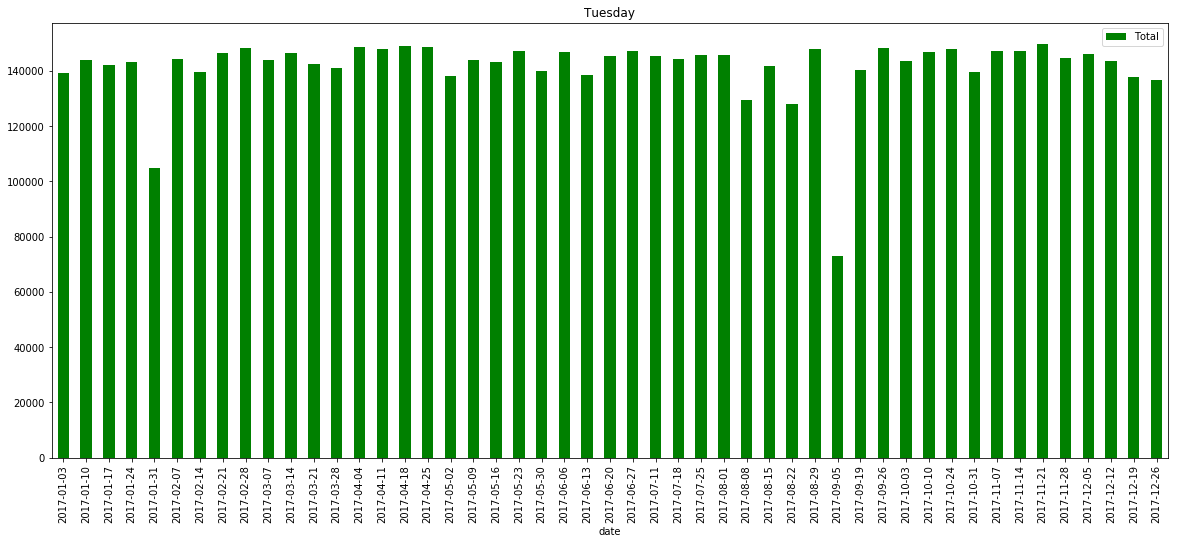

In [569]:
ax=df_139_t.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Tuesday', figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


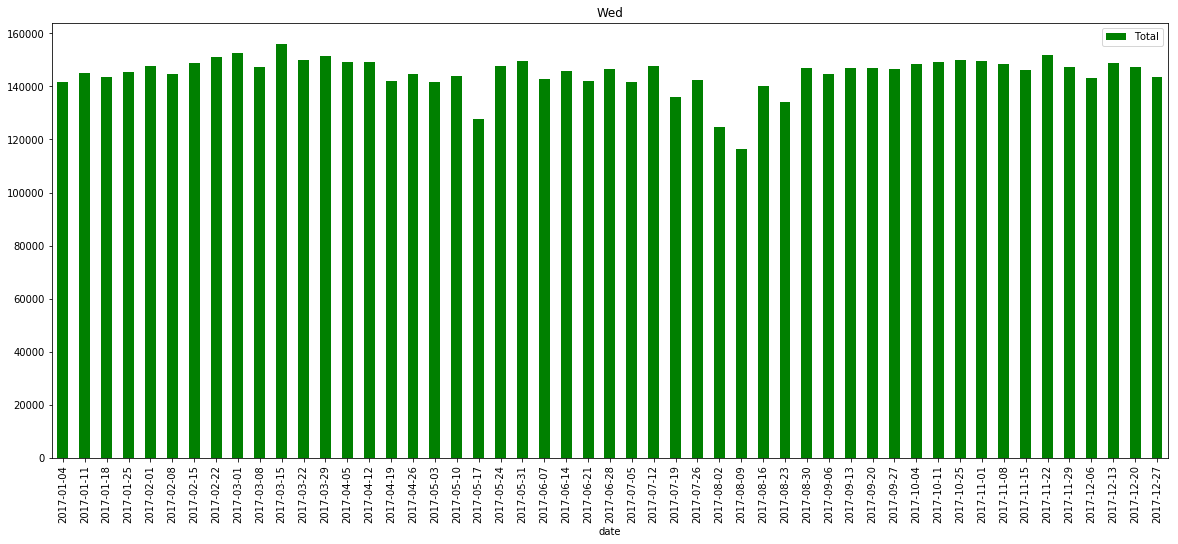

In [570]:
ax=df_139_w.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Wed', figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


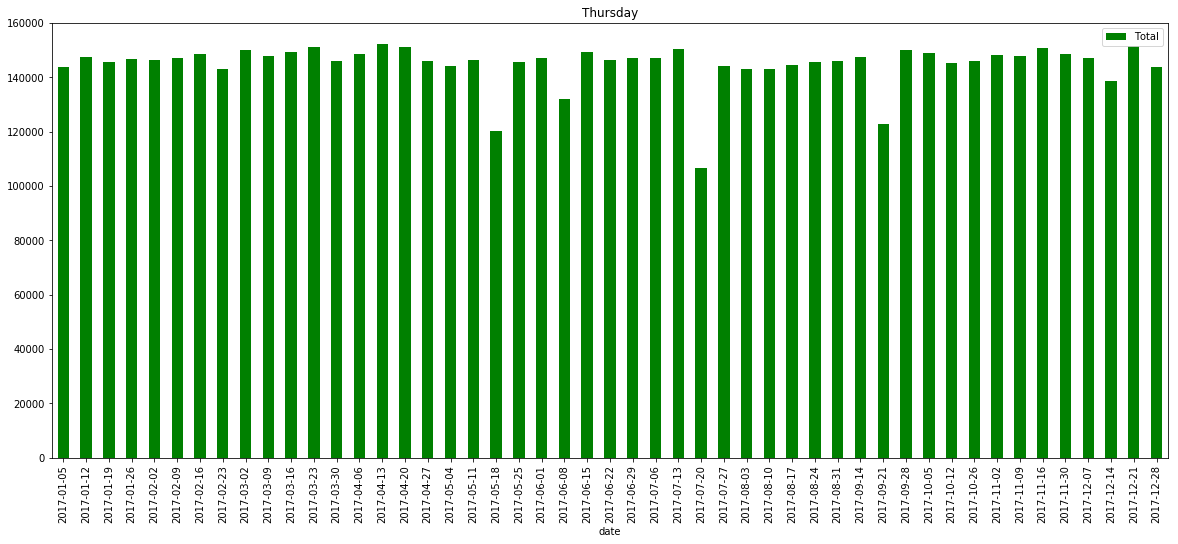

In [571]:
ax=df_139_th.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Thursday', figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


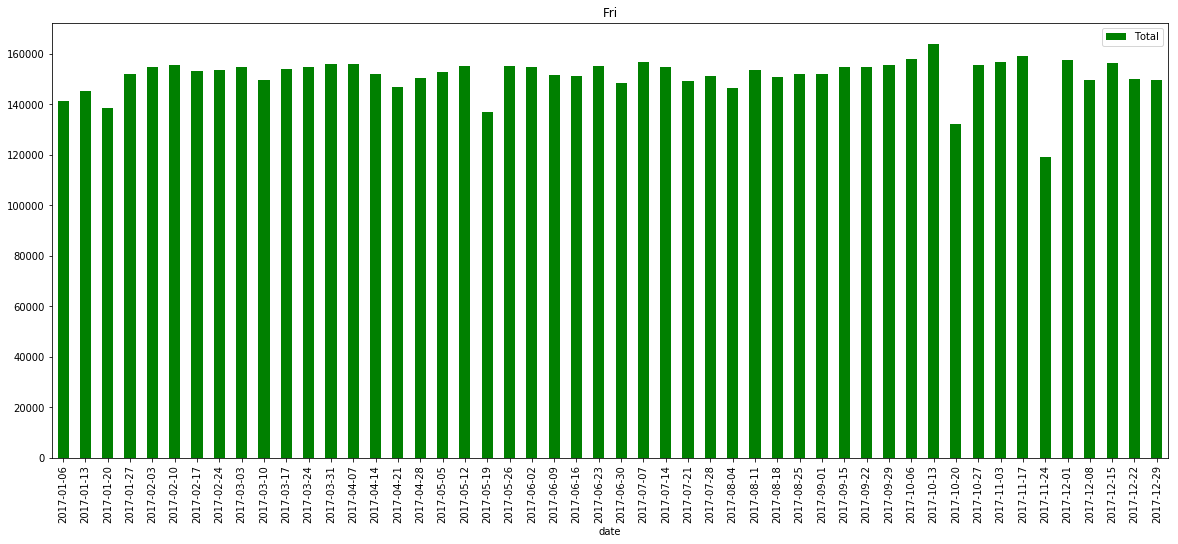

In [545]:
ax=df_139_f.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Fri', figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


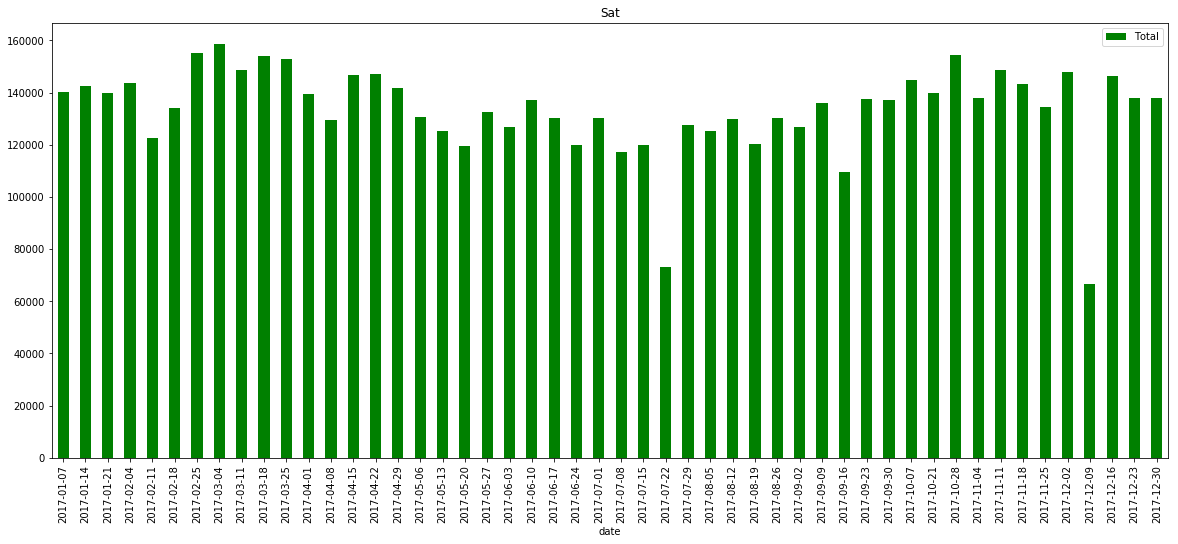

In [572]:
ax=df_139_sat.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Sat', figsize=(20,8))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


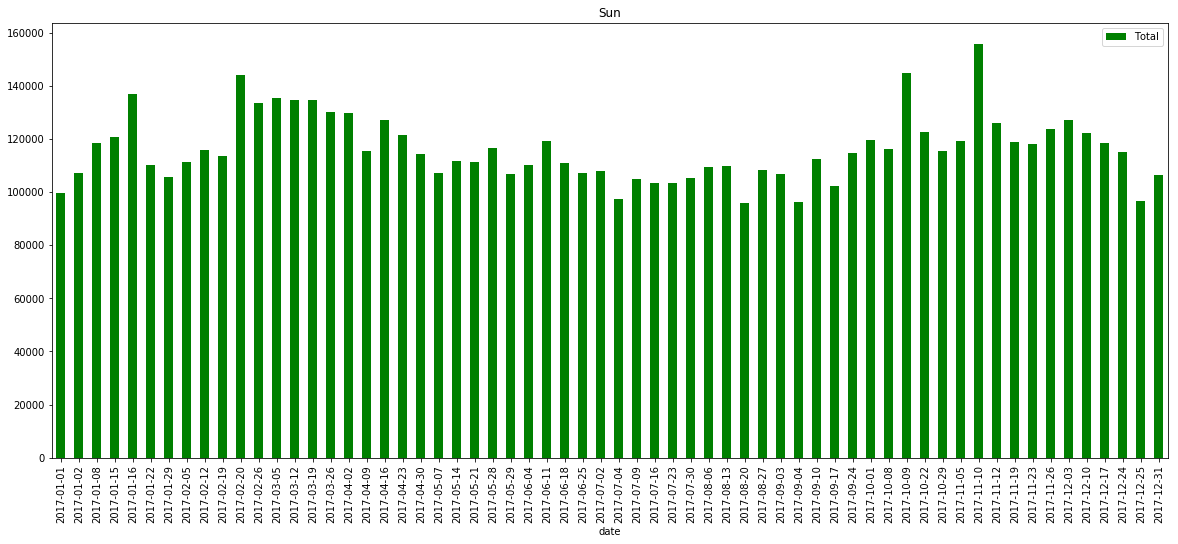

In [573]:
ax=df_139_sunh.plot(x="date", y=['Total'], kind="bar",color=['green'], title='Sun', figsize=(20,8))

In [279]:
os.chdir(r'I:\06_PROJECTS\In-house\i5012002 Fwy Seasonal Variation Factors')


#sheetname: None -> All sheets as a dictionary of DataFrames
df= pd.read_excel('139_ramp.xlsx', sheetname=None, ignore_index=True)
df_139 = pd.concat(df.values())


df_139['Total']=df_139.iloc[:,3:27].sum(axis=1)
df_139['AM']=df_139.iloc[:,9:13].sum(axis=1)
df_139['PM']=df_139.iloc[:,18:22].sum(axis=1)
df_139['MD']=df_139.iloc[:,13:18].sum(axis=1)


df_139_ADT=df_139[['det#','date', 'Total']]
df_139_am=df_139[['det#','date', 'AM']]
df_139_md=df_139[['det#','date', 'MD']]
df_139_pm=df_139[['det#','date', 'PM']]


loc_139_ADT=df_139_ADT.groupby(['date']).aggregate({'Total':sum}).reset_index()
loc_139_ADT['week'] = pd.to_datetime(loc_139['date']).dt.weekday_name
loc_139_ADT['week_of_year'] = pd.to_datetime(loc_139_ADT['date']).dt.week


loc_139_am=df_139.groupby(['date']).aggregate({'AM':sum}).reset_index()
loc_139_am['week'] = pd.to_datetime(loc_139_am['date']).dt.weekday_name
loc_139_am['week_of_year'] = pd.to_datetime(loc_139_am['date']).dt.week


loc_139_pm=df_139.groupby(['date']).aggregate({'PM':sum}).reset_index()
loc_139_pm['week'] = pd.to_datetime(loc_139_pm['date']).dt.weekday_name
loc_139_pm['week_of_year'] = pd.to_datetime(loc_139_pm['date']).dt.week


loc_139_md=df_139.groupby(['date']).aggregate({'MD':sum}).reset_index()
loc_139_md['week'] = pd.to_datetime(loc_139_md['date']).dt.weekday_name
loc_139_md['week_of_year'] = pd.to_datetime(loc_139_md['date']).dt.week



#export data
#Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('loc_139_ramp.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
loc_139_ADT.to_excel(writer, sheet_name='ADT')
loc_139_am.to_excel(writer, sheet_name='am')
loc_139_pm.to_excel(writer, sheet_name='pm')
loc_139_md.to_excel(writer, sheet_name='md')
#Close the Pandas Excel writer and output the Excel file.
writer.save()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [456]:
#sheetname: None -> All sheets as a dictionary of DataFrames
df= pd.read_excel('139_ramp.xlsx', sheetname=None, ignore_index=True)
df_139 = pd.concat(df.values())


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [259]:
(277+364)/2

320.5

In [509]:
holidays

[datetime.datetime(2017, 1, 2, 0, 0),
 datetime.datetime(2017, 1, 16, 0, 0),
 datetime.datetime(2017, 2, 20, 0, 0),
 datetime.datetime(2017, 5, 29, 0, 0),
 datetime.datetime(2017, 7, 4, 0, 0),
 datetime.datetime(2017, 9, 4, 0, 0),
 datetime.datetime(2017, 10, 9, 0, 0),
 datetime.datetime(2017, 11, 10, 0, 0),
 datetime.datetime(2017, 11, 23, 0, 0),
 datetime.datetime(2017, 12, 25, 0, 0)]